In [1]:
## Building static plots
import os
idir = 'static/images'
ifol = lambda fn: os.path.join(idir, fn)
ifol('test.jpeg')

'static/images/test.jpeg'

In [2]:
from util import *
pd.set_option('max_colwidth', None)
sql('SELECT * FROM sqlite_master')

,type,name,tbl_name,rootpage,sql
0,table,cruce_distrito,cruce_distrito,3,"CREATE TABLE ""cruce_distrito"" (\n""tema"" TEXT,\n ""distrito"" INTEGER,\n ""nProgramas"" INTEGER,\n ""nMenciones"" INTEGER\n)"
1,table,cruce_lista,cruce_lista,8,"CREATE TABLE ""cruce_lista"" (\n""tipo"" TEXT,\n ""tema"" TEXT,\n ""nMenciones"" INTEGER,\n ""nProgramas"" INTEGER,\n ""lista"" TEXT\n)"
2,table,cruce_partido,cruce_partido,24,"CREATE TABLE ""cruce_partido"" (\n""tipo"" TEXT,\n ""tema"" TEXT,\n ""nMenciones"" INTEGER,\n ""nProgramas"" INTEGER,\n ""partido"" TEXT\n)"
3,table,menciones,menciones,2,"CREATE TABLE ""menciones"" (\n""Tema"" TEXT,\n ""nMenciones"" INTEGER,\n ""Mencionan"" INTEGER,\n ""link"" TEXT\n)"


In [16]:
sql('SELECT * FROM cruce_distrito LIMIT 3')

,tema,distrito,nProgramas,nMenciones
0,agua,1,17,54
1,agua,2,20,80
2,agua,3,22,62


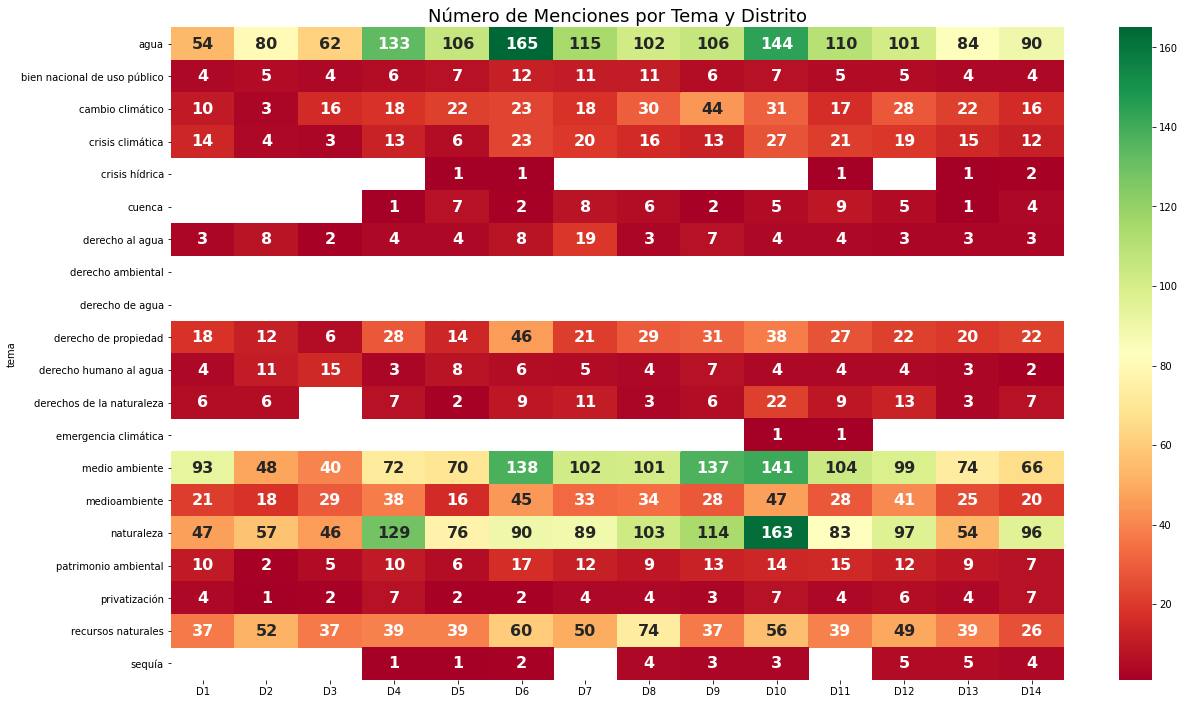

In [41]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(20,12))
ldf1 = sql('SELECT tema, distrito, nMenciones FROM cruce_distrito')
pdf1 = ldf1.pivot_table(index='tema', columns='distrito', aggfunc='sum')
pdf1[pdf1==0]=np.nan; pdf1a=pdf1[pdf1.columns[:14]]; pdf1a.columns=[f'D{c[1]}' for c in pdf1a.columns]
sns.heatmap(pdf1a, annot=True, annot_kws={'weight':'bold', 'size':16}, fmt='.0f', cmap='RdYlGn');
plt.title('Número de Menciones por Tema y Distrito', size=18);
plt.savefig(ifol('dist1.png'))

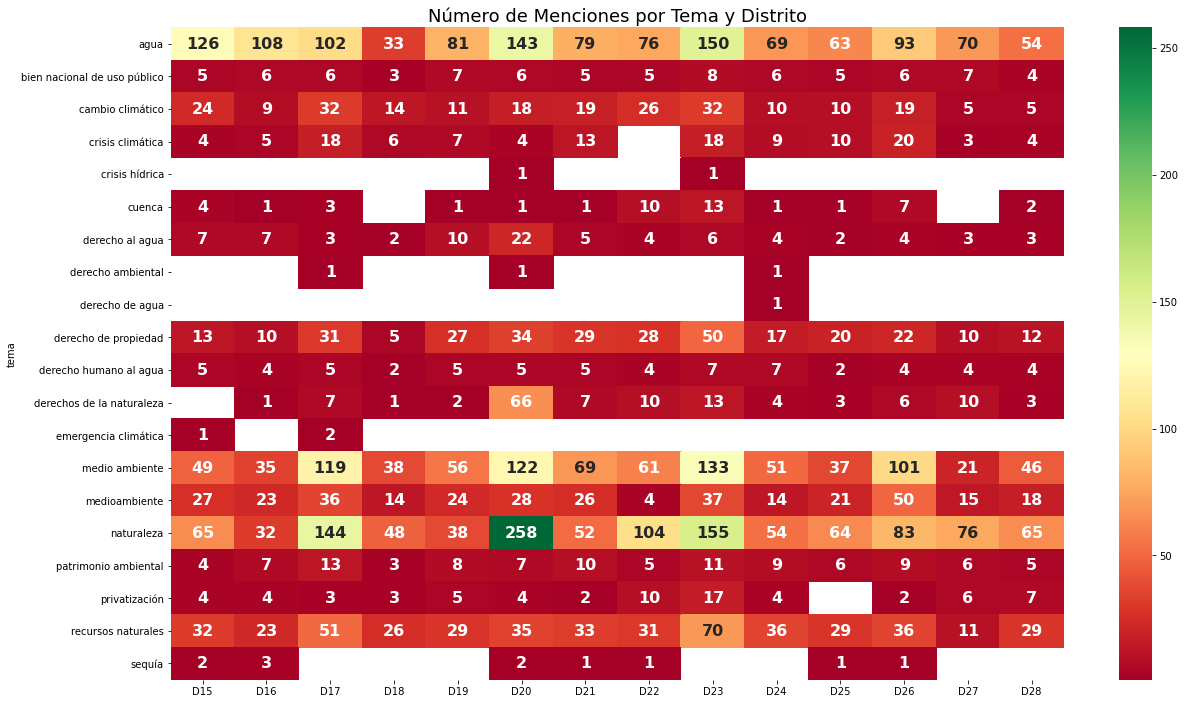

In [40]:
fig, ax = plt.subplots(1, figsize=(20,12))
pdf1b=pdf1[pdf1.columns[14:]]; pdf1b.columns=[f'D{c[1]}' for c in pdf1b.columns]
sns.heatmap(pdf1b, annot=True, annot_kws={'weight':'bold', 'size':16}, fmt='.0f', cmap='RdYlGn');
plt.title('Número de Menciones por Tema y Distrito', size=18);
plt.savefig(ifol('dist2.png'))

In [73]:
def seaplot(pdf, titulo, filename, angle):  # 'Número de Menciones por Tema y Distrito'
    fig, ax = plt.subplots(1, figsize=(20,12))
    sns.heatmap(pdf, annot=True, 
                annot_kws={'weight':'bold', 'size':16}, 
                fmt='.0f', cmap='RdYlGn');
    plt.title(titulo, size=18);
    plt.savefig(ifol(filename))
    if angle is not None:
        plt.xticks(rotation=angle)

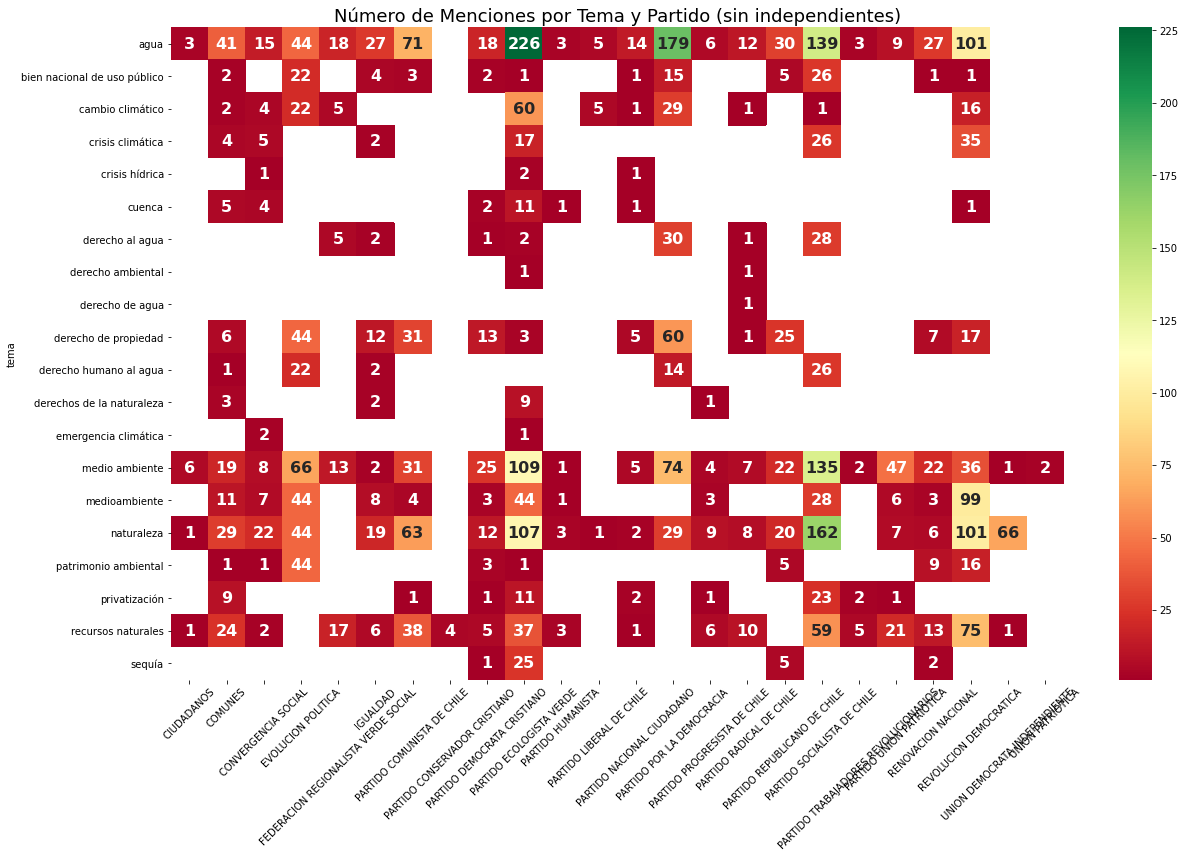

In [74]:
pdf = sql("SELECT tema, partido, nMenciones FROM cruce_partido WHERE partido NOT LIKE 'INDEPEN%'")
pdf['partido'] = pdf.partido.apply(lambda p: p.replace('IND ',''))
pdf1 = pdf.pivot_table(index='tema', columns='partido', aggfunc='sum'); pdf1[pdf1==0]=np.nan
pdf1.columns = [c[1] for c in pdf1.columns]
pdf1.sort_index(level=1, inplace=True)
seaplot(pdf1, 'Número de Menciones por Tema y Partido (sin independientes)', 'part.png', 45)

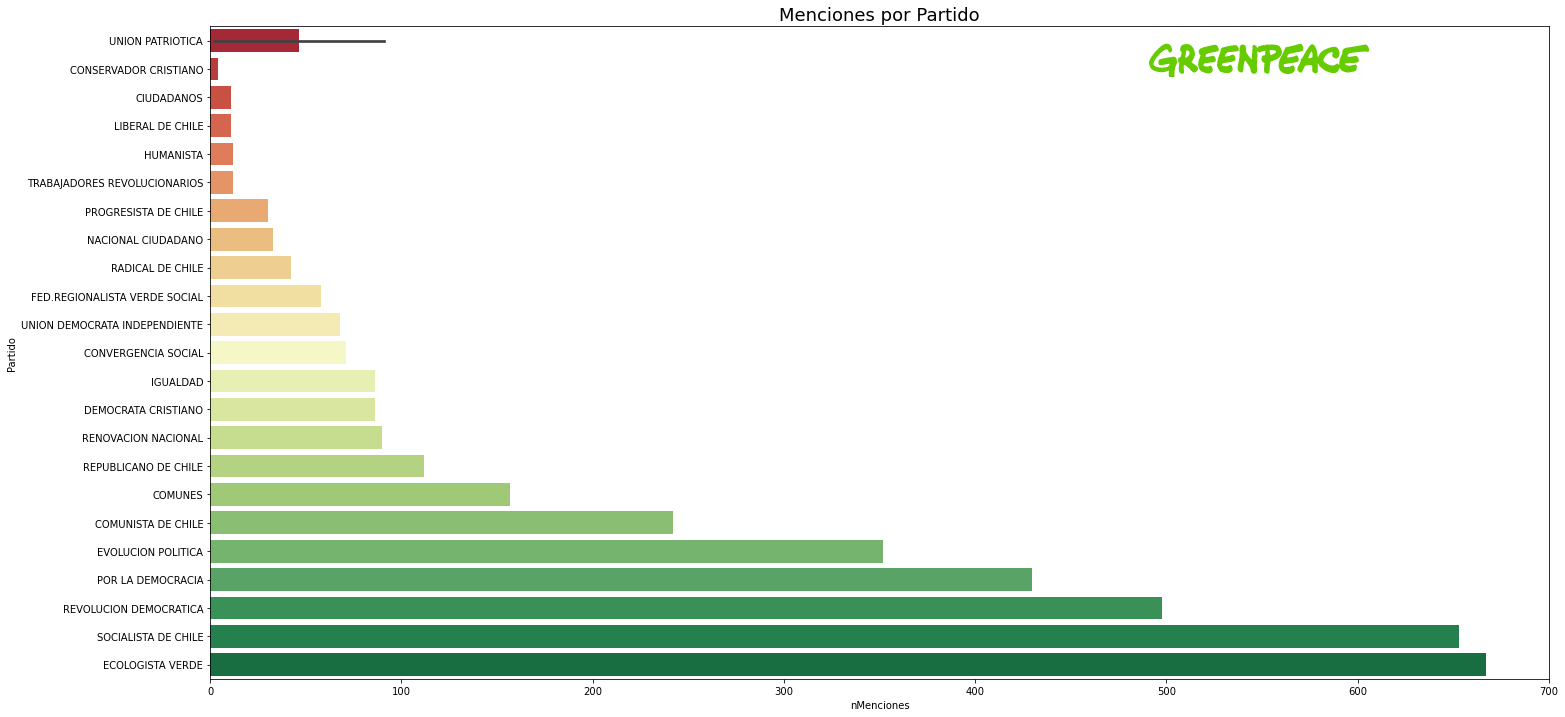

In [90]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

gp = mpimg.imread('greenpeace.png')
imagebox = OffsetImage(gp, zoom=1.0)
ab = AnnotationBbox(imagebox, (550, 0.6), frameon=False)

xdf = pdf1.sum().sort_values().reset_index()
fig, ax = plt.subplots(1, figsize=(24,12))
ax.add_artist(ab)
xdf.columns = ['Partido', 'nMenciones']; xdf['Partido'] = xdf.Partido.apply(lambda p: p.replace('PARTIDO ','').replace('FEDERACION ','FED.'))
sns.barplot(data=xdf, x='nMenciones', y='Partido', palette='RdYlGn');
plt.title('Menciones por Partido', size=18);
plt.savefig(ifol('partidos.png'))

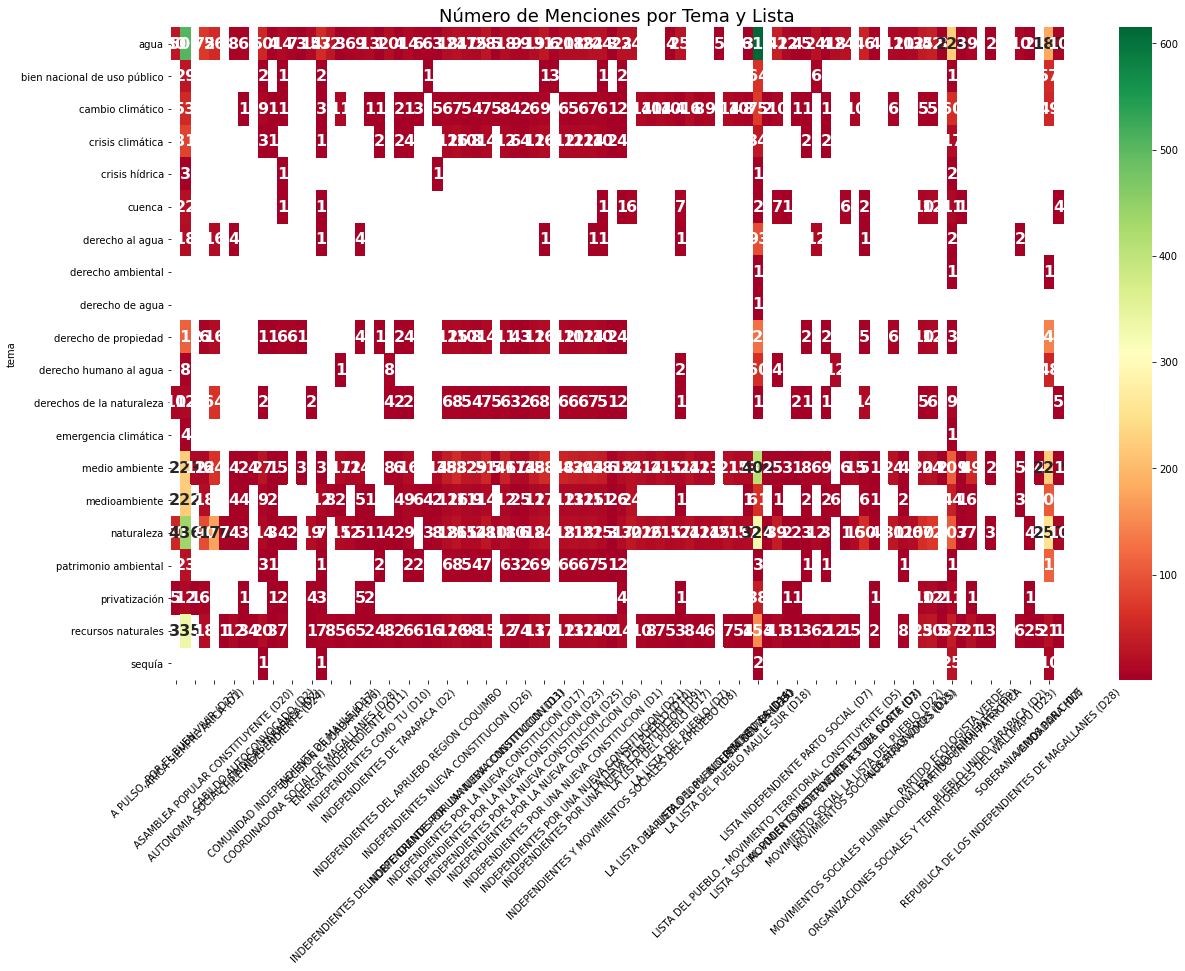

In [93]:
ldf = sql("SELECT tema, lista, nMenciones FROM cruce_lista")
ldf1 = ldf.pivot_table(index='tema', columns='lista', aggfunc='sum'); ldf1[ldf1==0]=np.nan
ldf1.columns = [c[1] for c in ldf1.columns]
seaplot(ldf1, 'Número de Menciones por Tema y Lista', 'lista.png', 45)

In [94]:
ldf.lista.unique()

array(['A PULSO, POR EL BUEN VIVIR (D27)', 'APRUEBO DIGNIDAD',
       'ARICA SIEMPRE ARICA (D1)', 'ASAMBLEA CONSTITUYENTE ATACAMA',
       'ASAMBLEA POPULAR CONSTITUYENTE (D20)',
       'ASAMBLEA POPULAR POR LA DIGNIDAD (D17)',
       'AUTONOMIA SOCIAL Y SINDICAL TARAPACA (D2)',
       'BIOBIO SIN PARTIDOS (D21)', 'CABILDO AUTOCONVOCADO (D2)',
       'CANDIDATURA INDEPENDIENTE', 'CHILE INDEPENDIENTE (D24)',
       'CIUDADANOS CRISTIANOS', 'COMUNIDAD INDEPENDIENTE DE MAULE (D17)',
       'COMUNIDAD INDEPENDIENTE VENSEREMOS (D8)',
       'COORDINADORA SOCIAL DE MAGALLANES (D28)',
       'CORRIENTES INDEPENDIENTES (D16)', 'DECISION CIUDADANA (D6)',
       'ELIGE LA LISTA DEL PUEBLO (D23)', 'ENERGIA INDEPENDIENTE (D11)',
       'FUERZA SOCIAL DE ÑUBLE, LA LISTA DEL PUEBLO (D19)',
       'INDEPENDIENTES COMO TU (D10)', 'INDEPENDIENTES CON CHILE (D11)',
       'INDEPENDIENTES DE TARAPACA (D2)',
       'INDEPENDIENTES DE ÑUBLE POR LA NUEVA CONSTITUCION (D19)',
       'INDEPENDIENTES DEL APRUE

In [101]:
ldf['dist'] = ldf.lista.apply(lambda l: l.split('(')[1][:-1] if len(l.split('('))>1 else 'nacional')
str(ldf.dist.value_counts())

'nacional    15520\nD7            760\nD6            640\nD10           600\nD17           560\nD11           540\nD20           460\nD2            440\nD12           400\nD23           400\nD8            400\nD9            380\nD13           340\nD28           320\nD1            300\nD22           300\nD3            280\nD5            280\nD24           280\nD26           240\nD19           220\nD16           220\nD21           220\nD15           200\nD14           200\nD25           160\nD27           140\nD4            120\nD18           100\nName: dist, dtype: int64'

/home/bitnami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


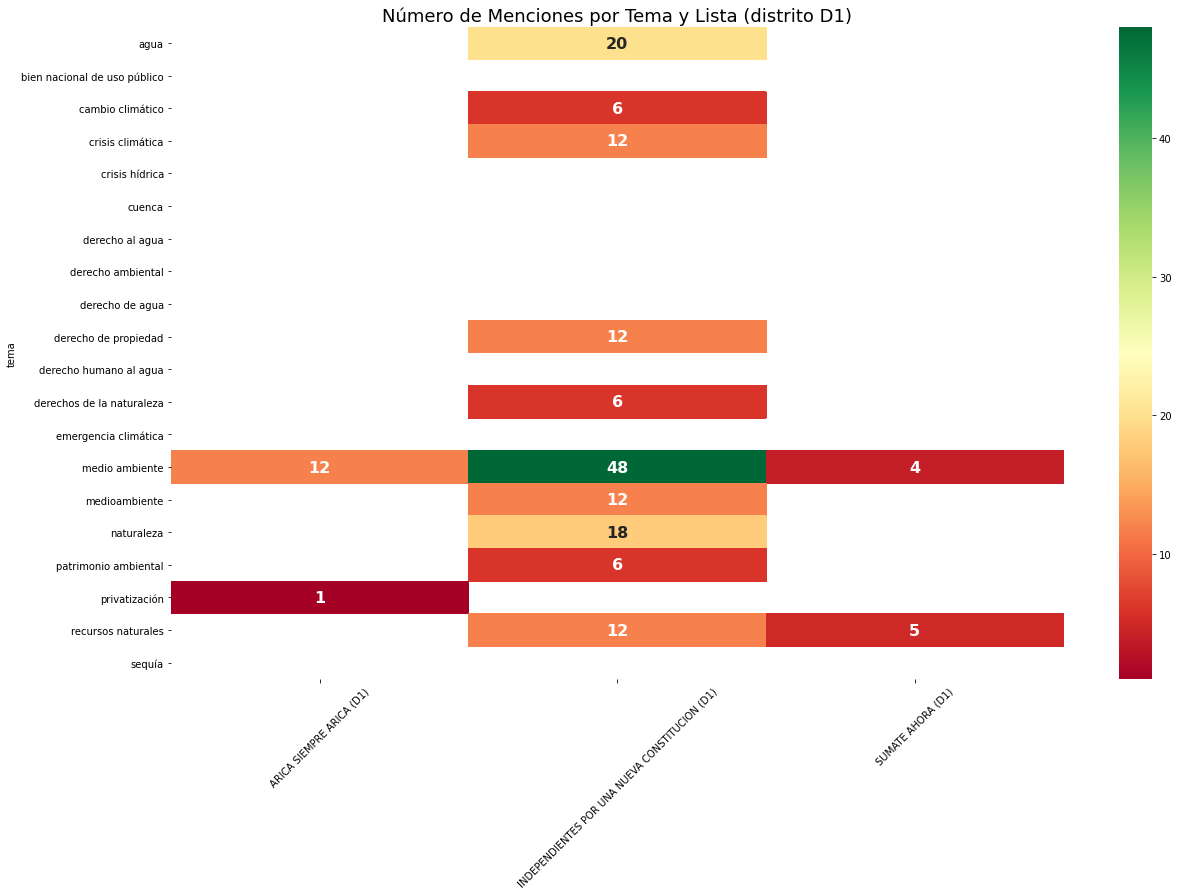

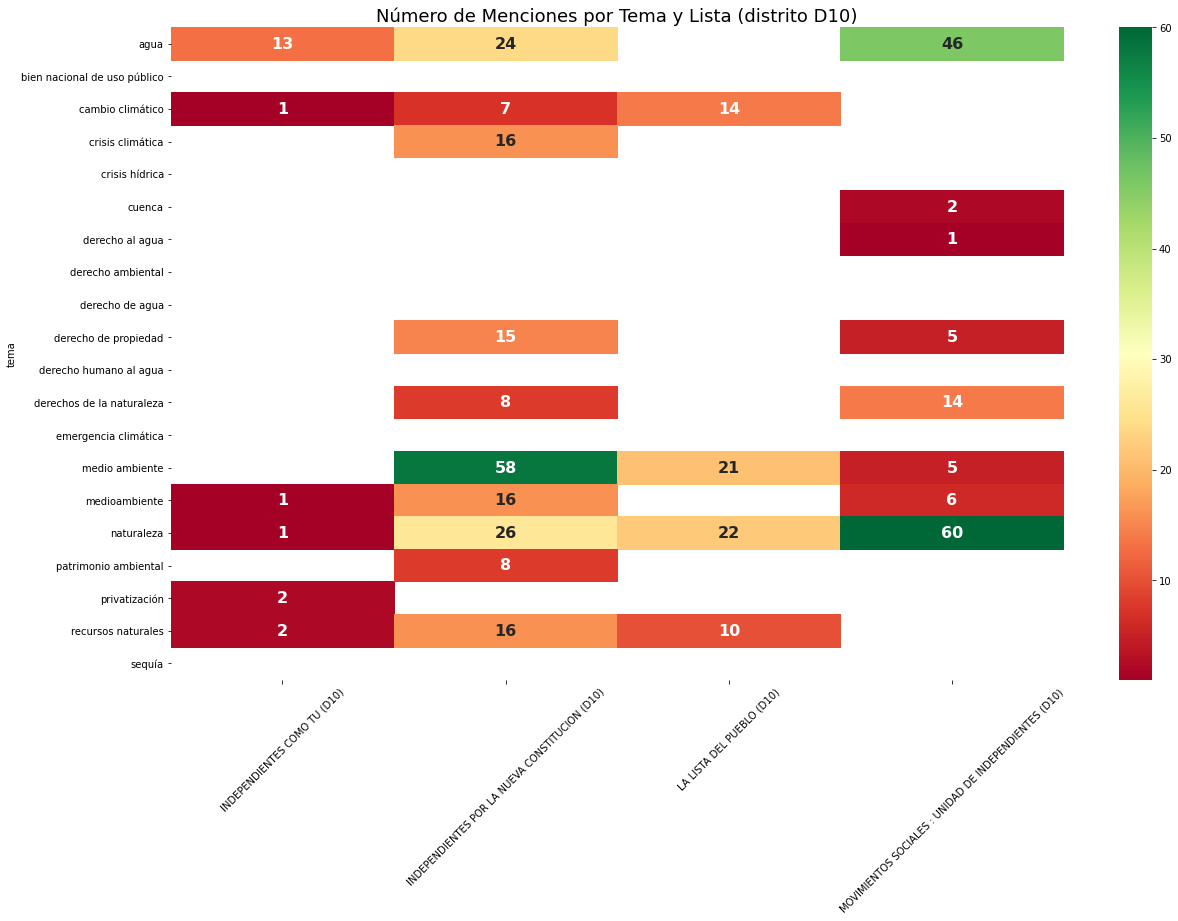

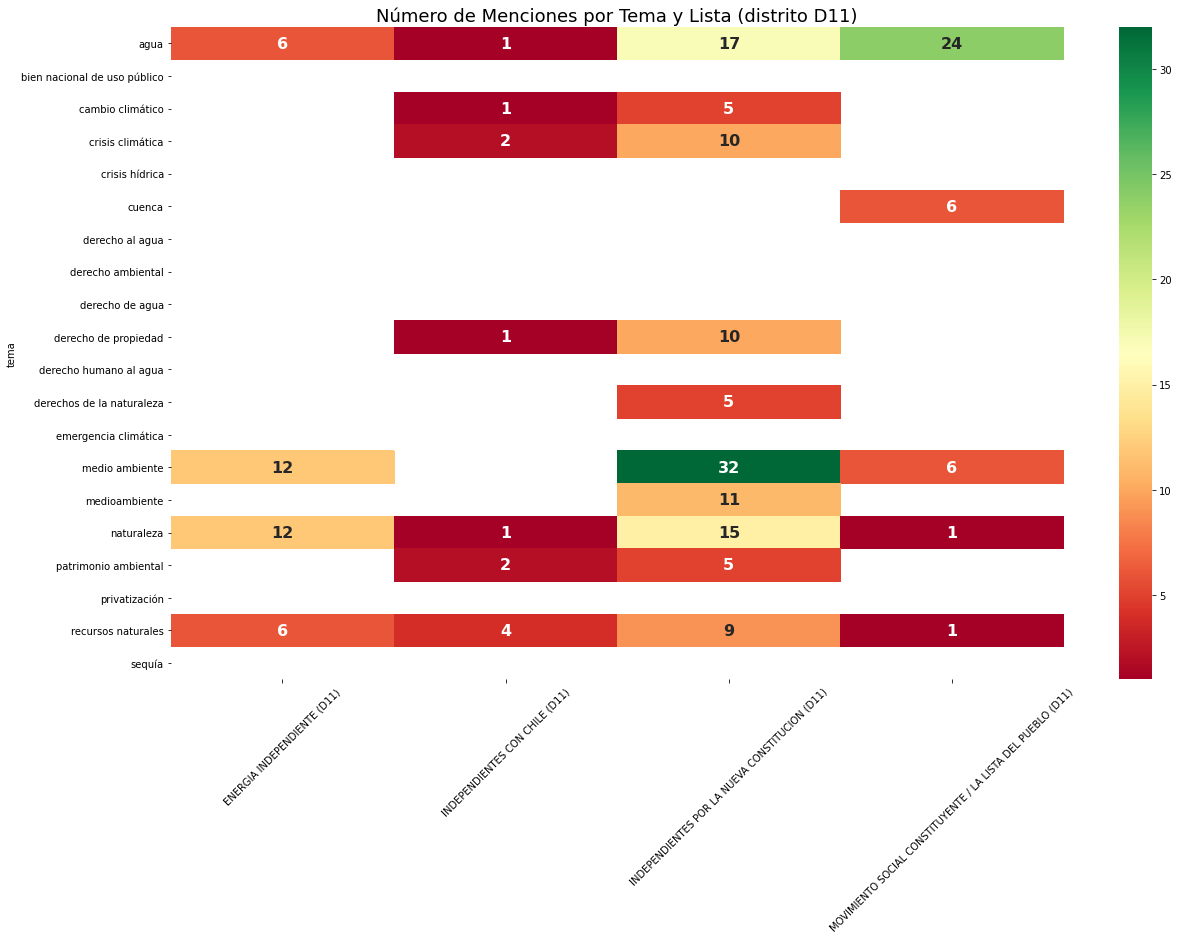

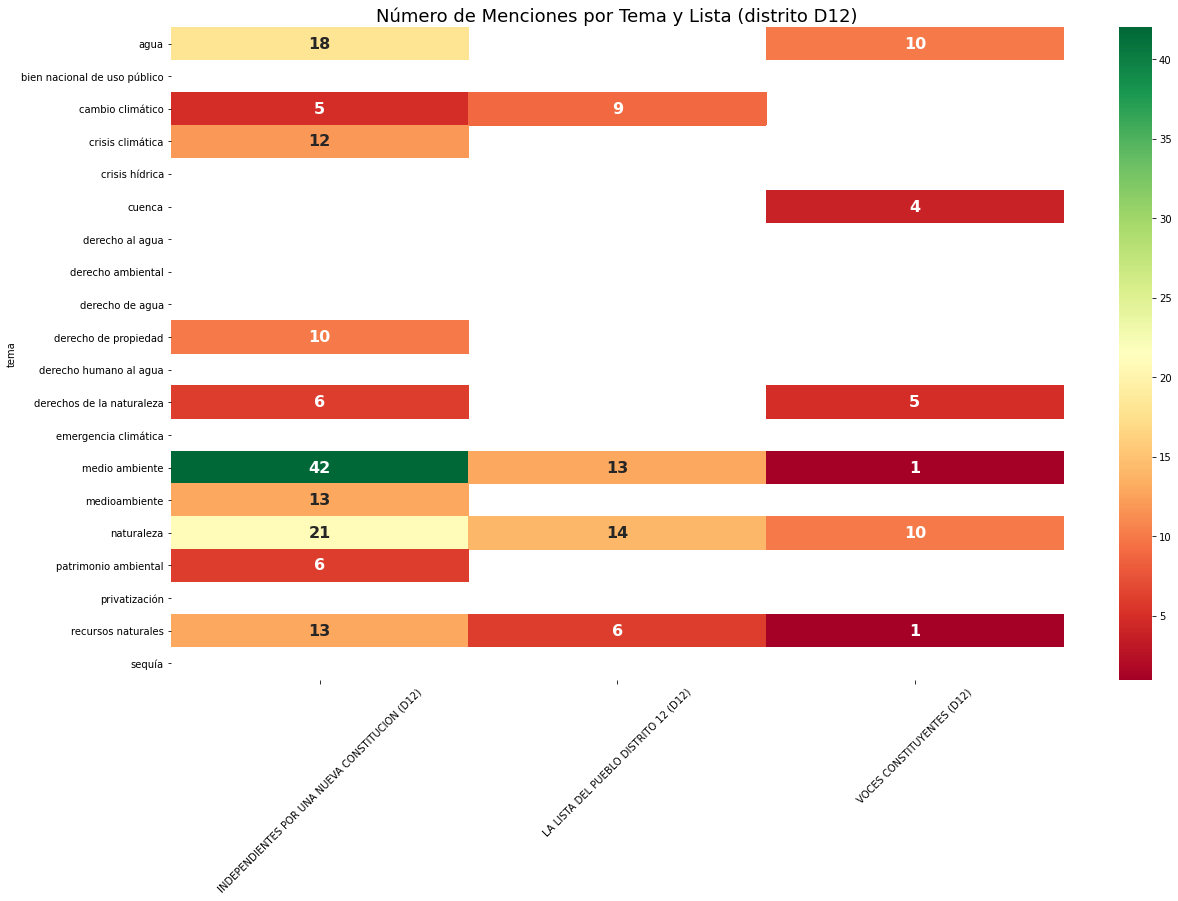

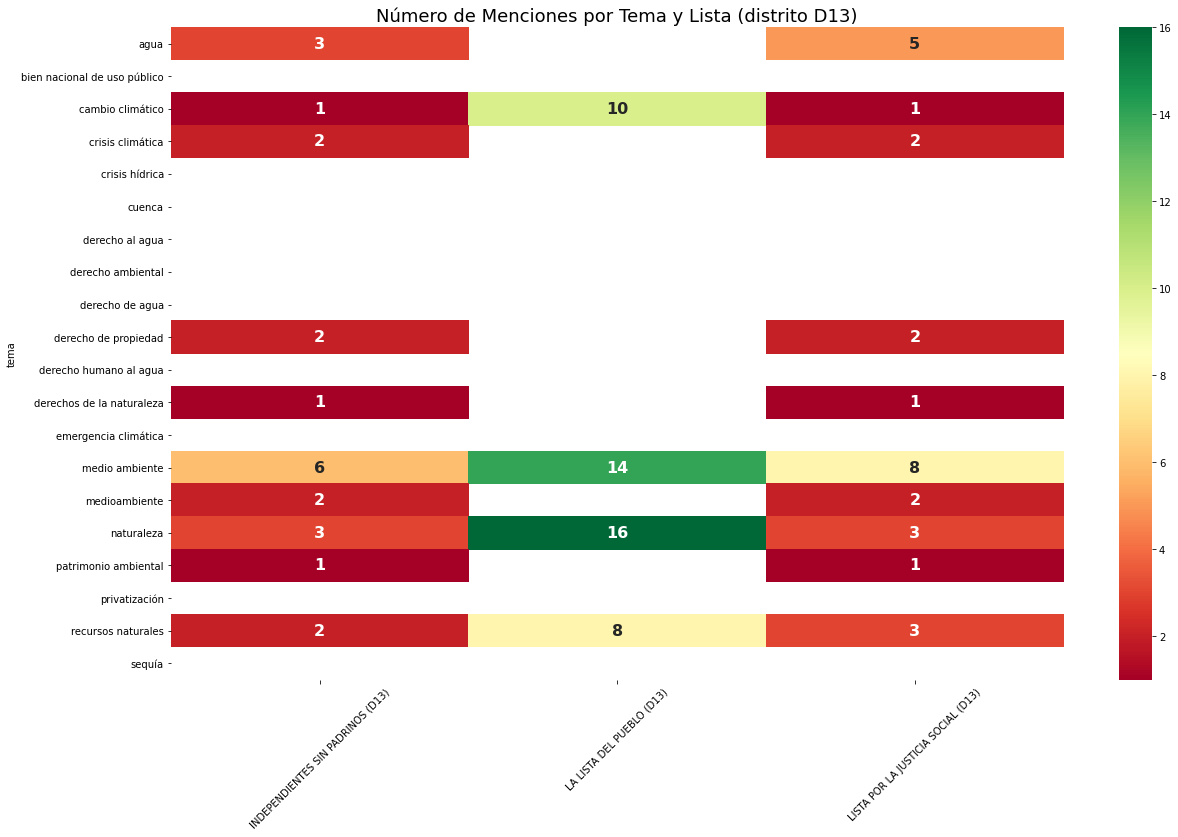

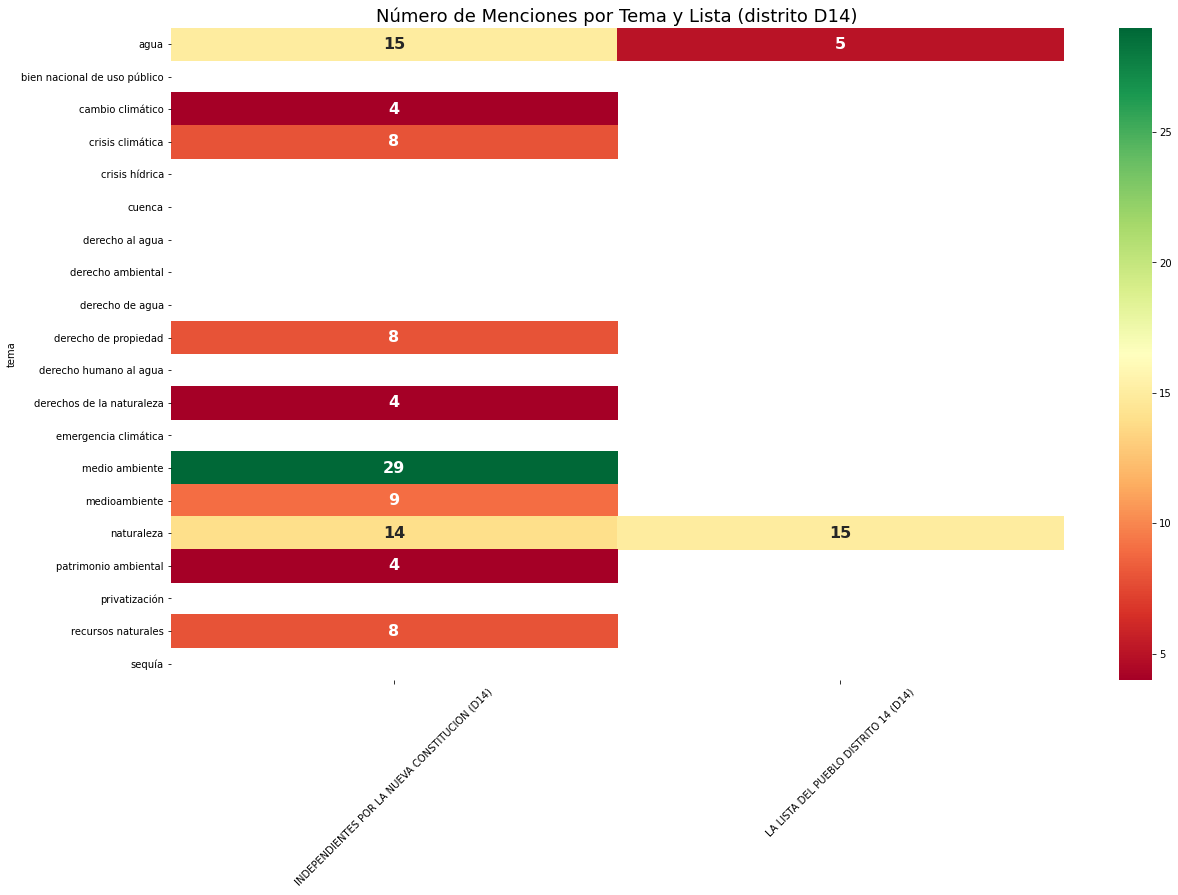

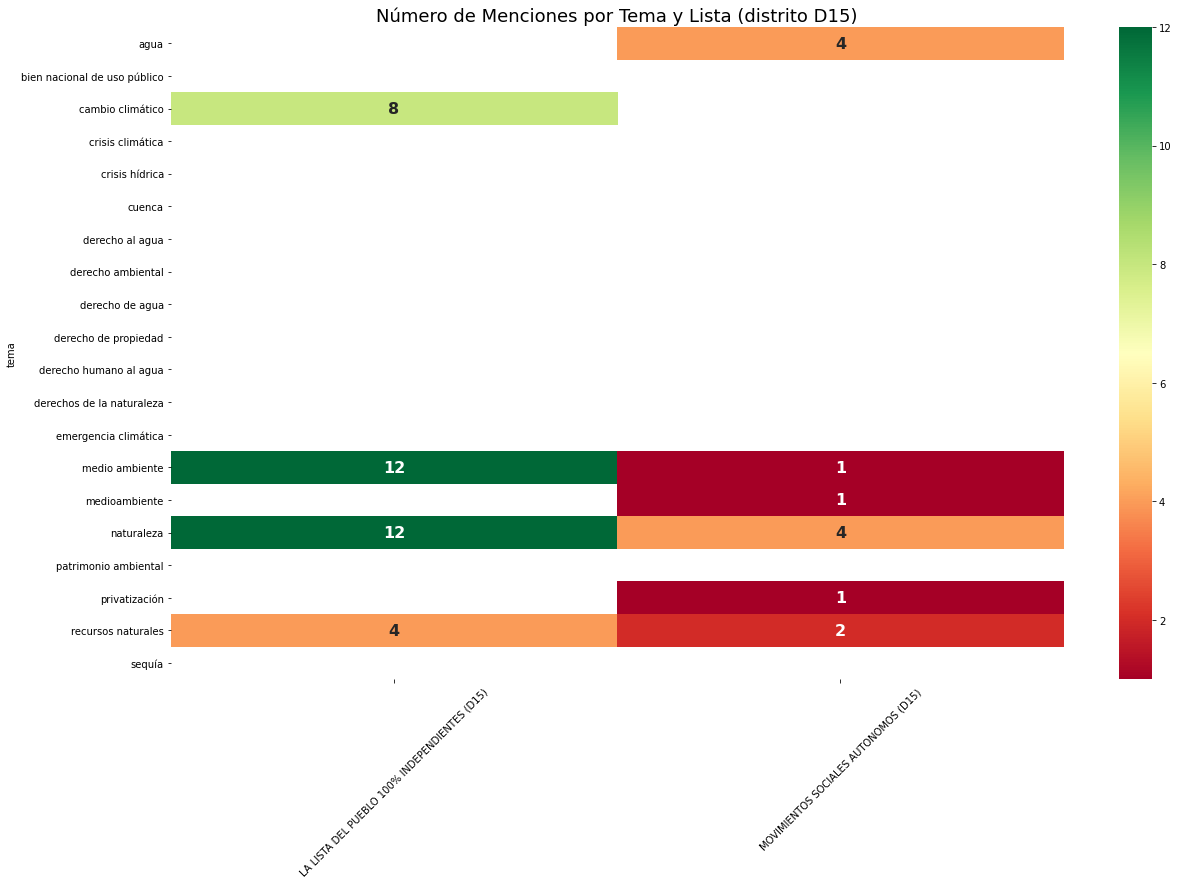

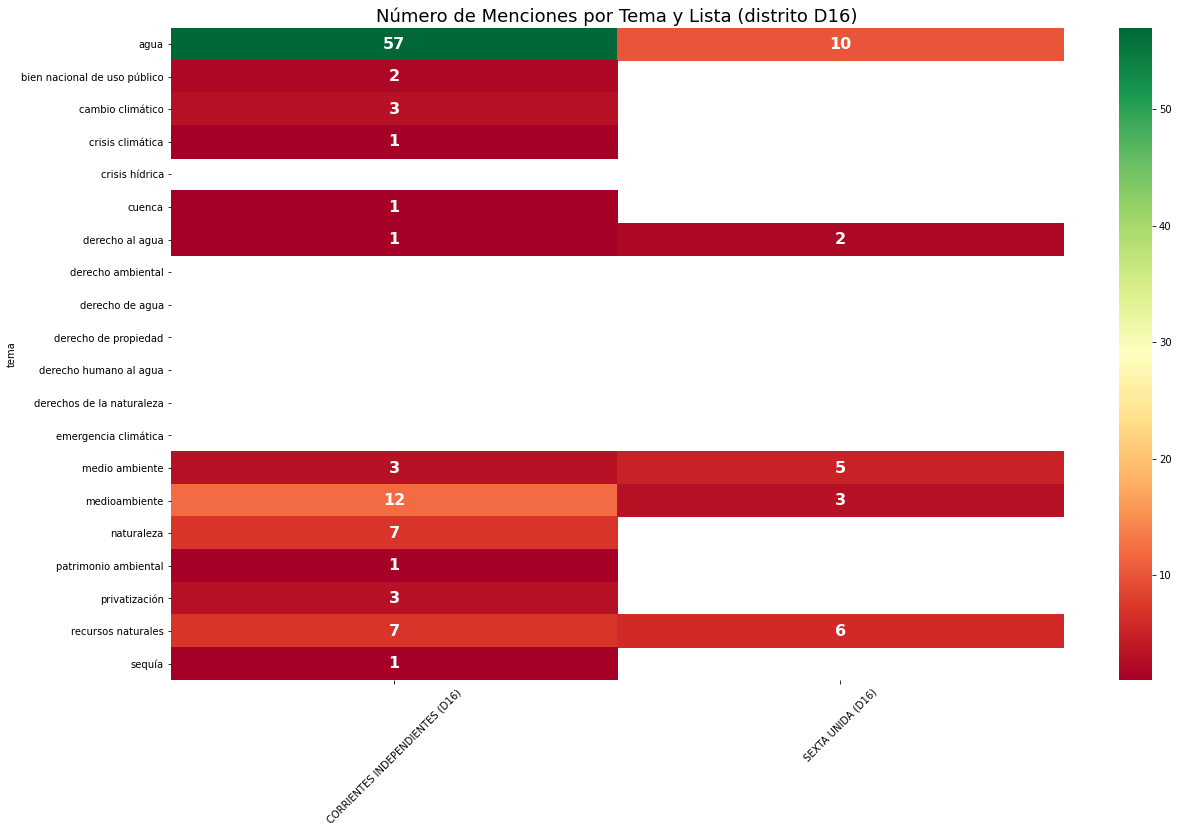

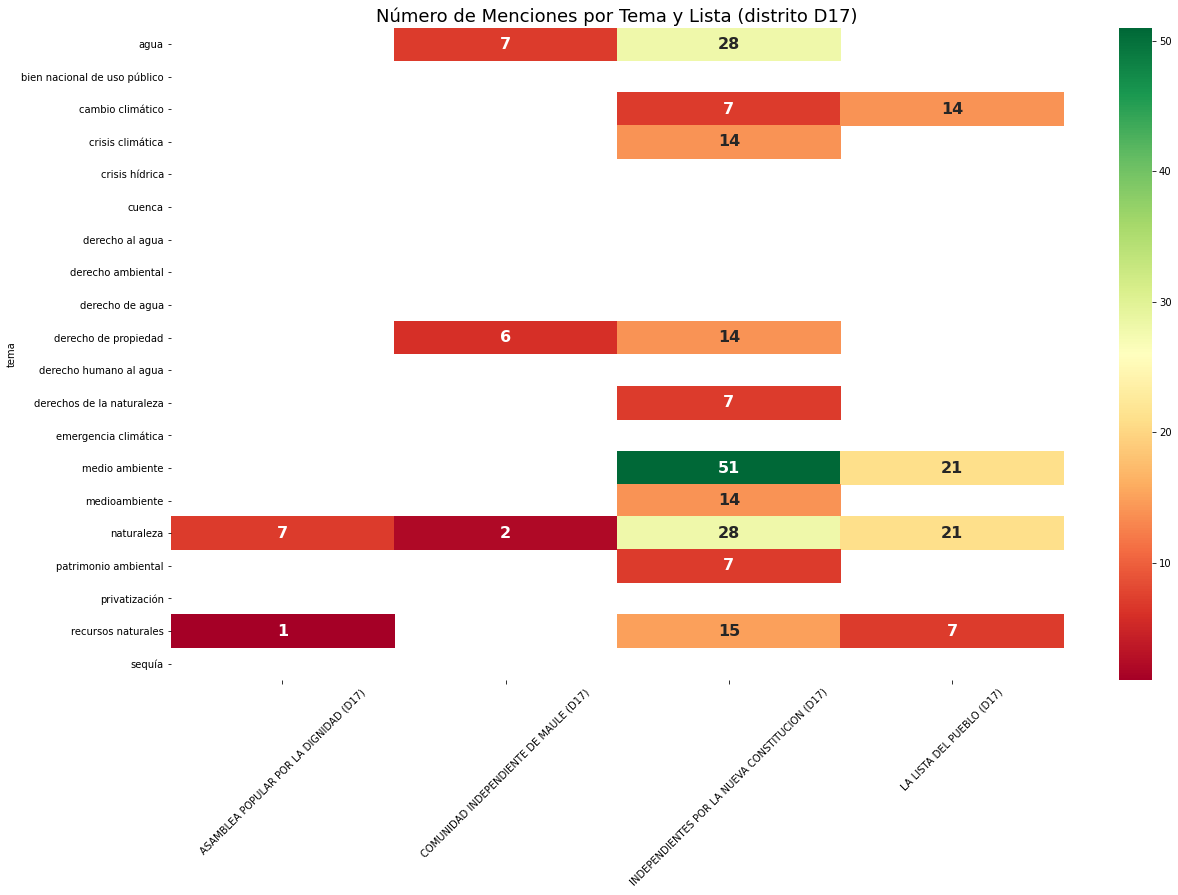

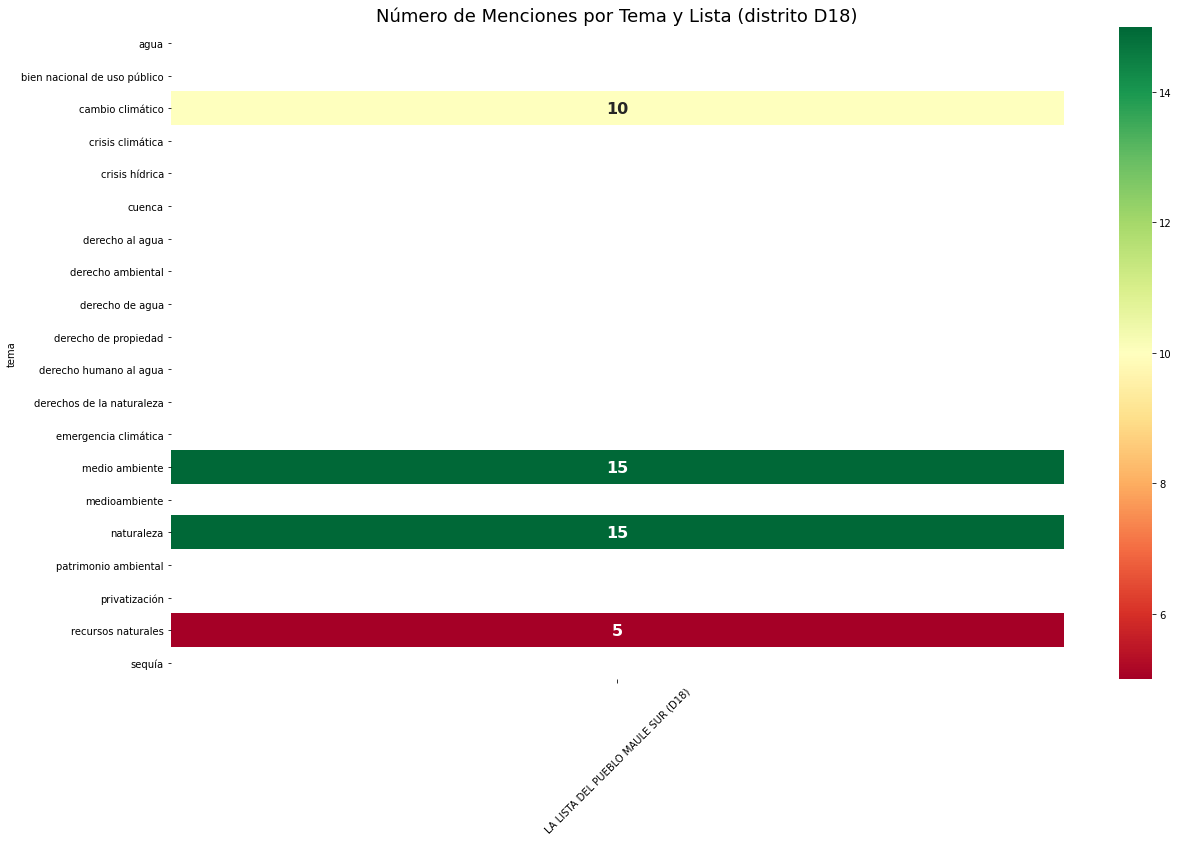

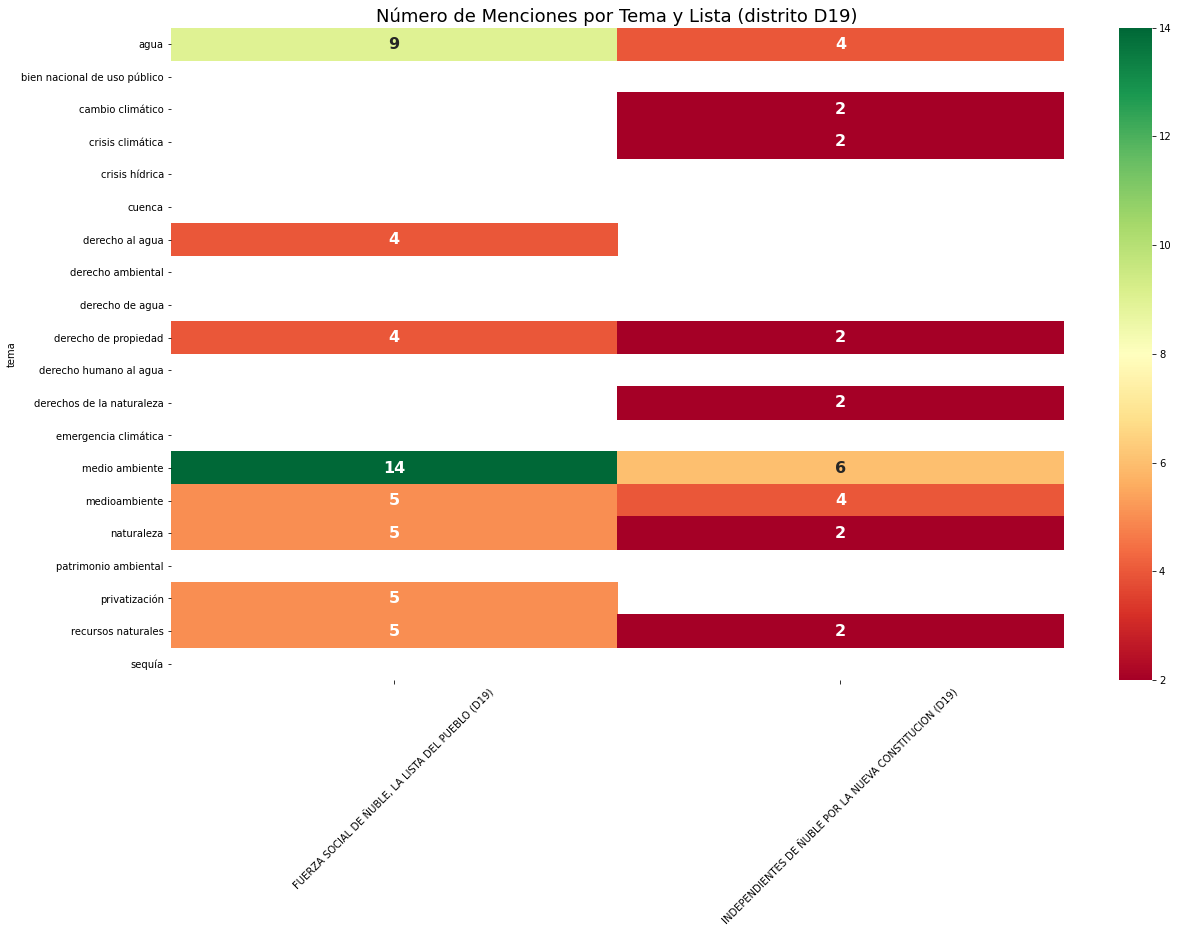

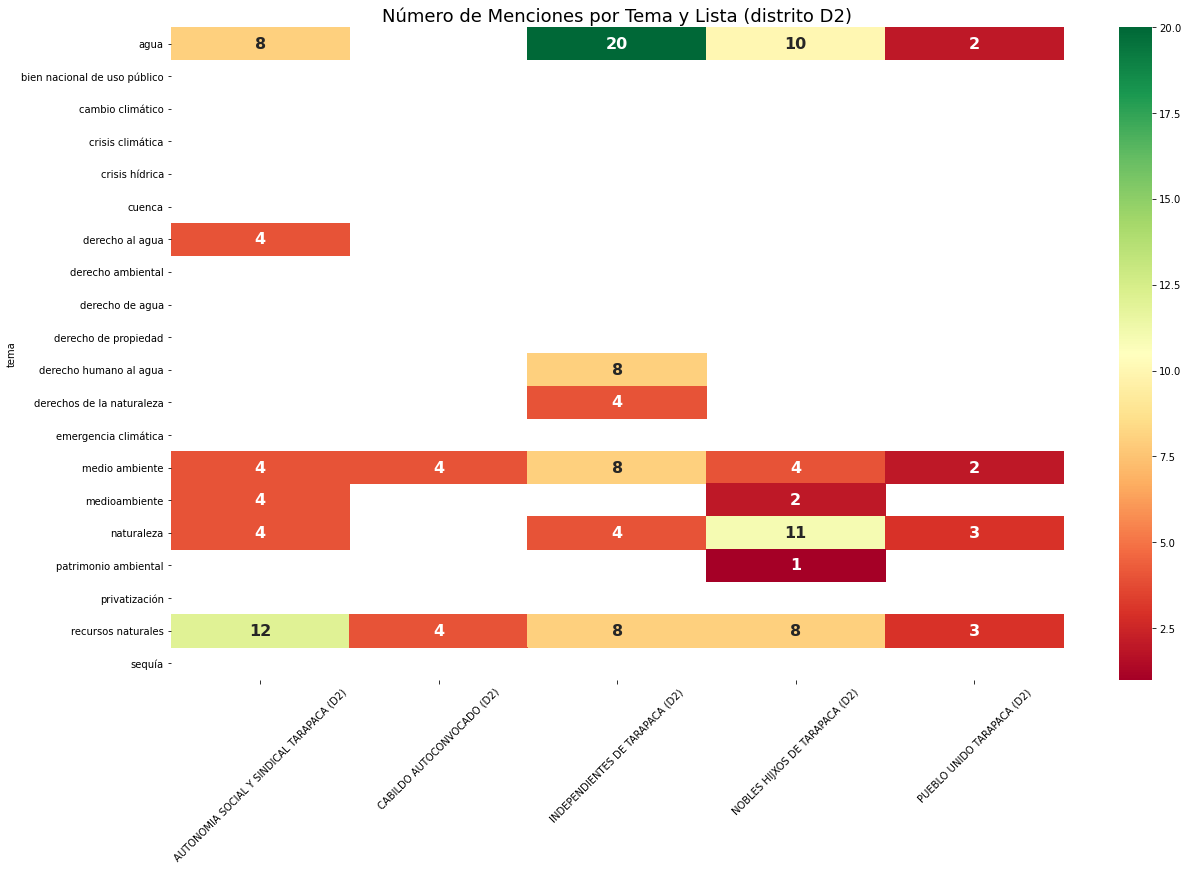

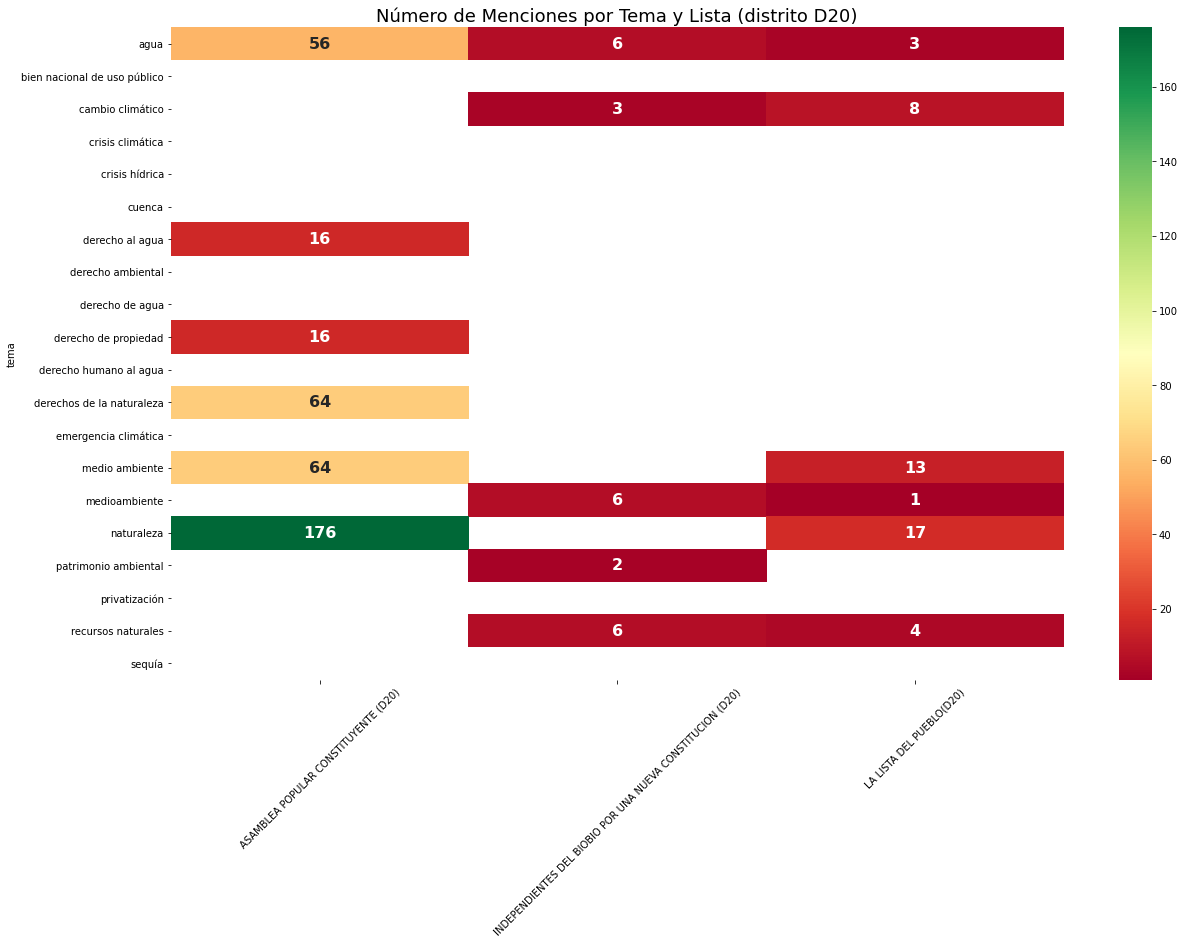

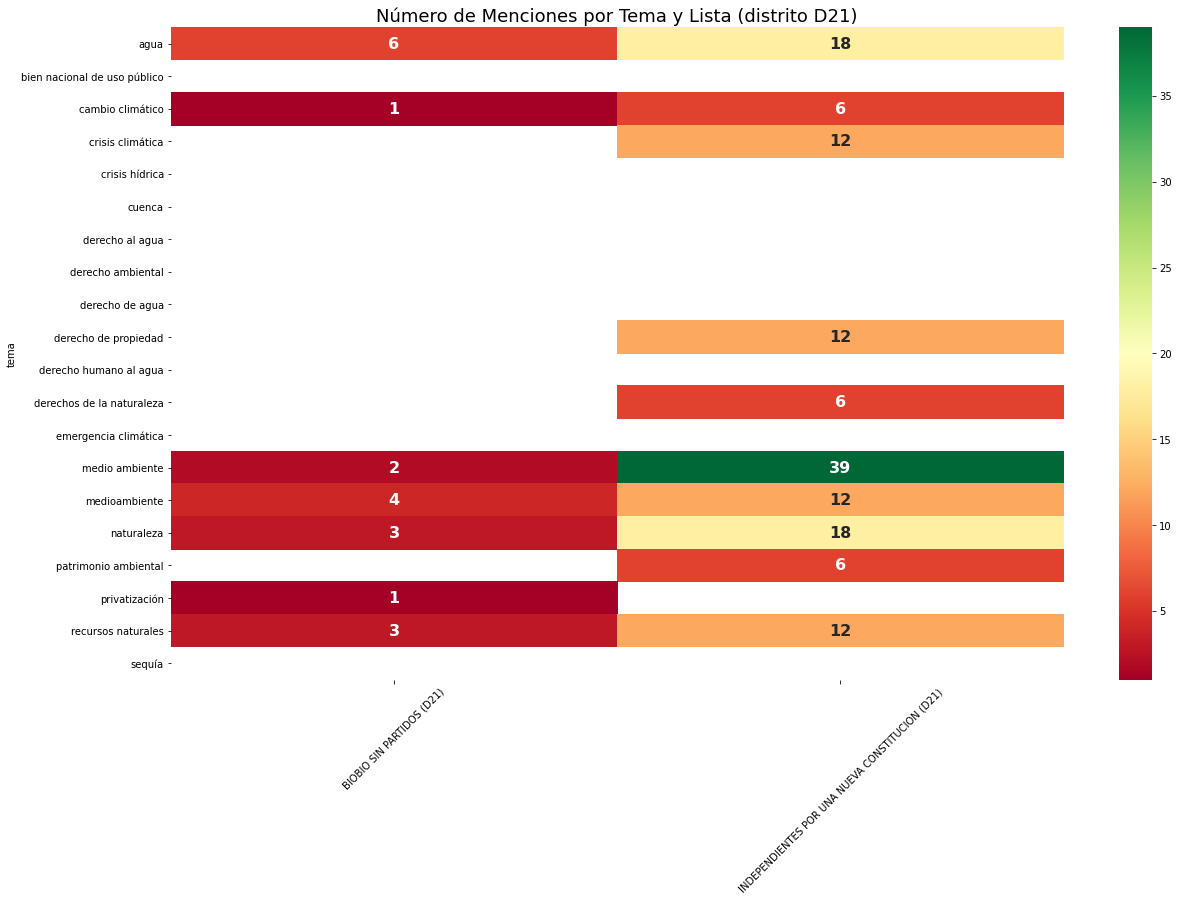

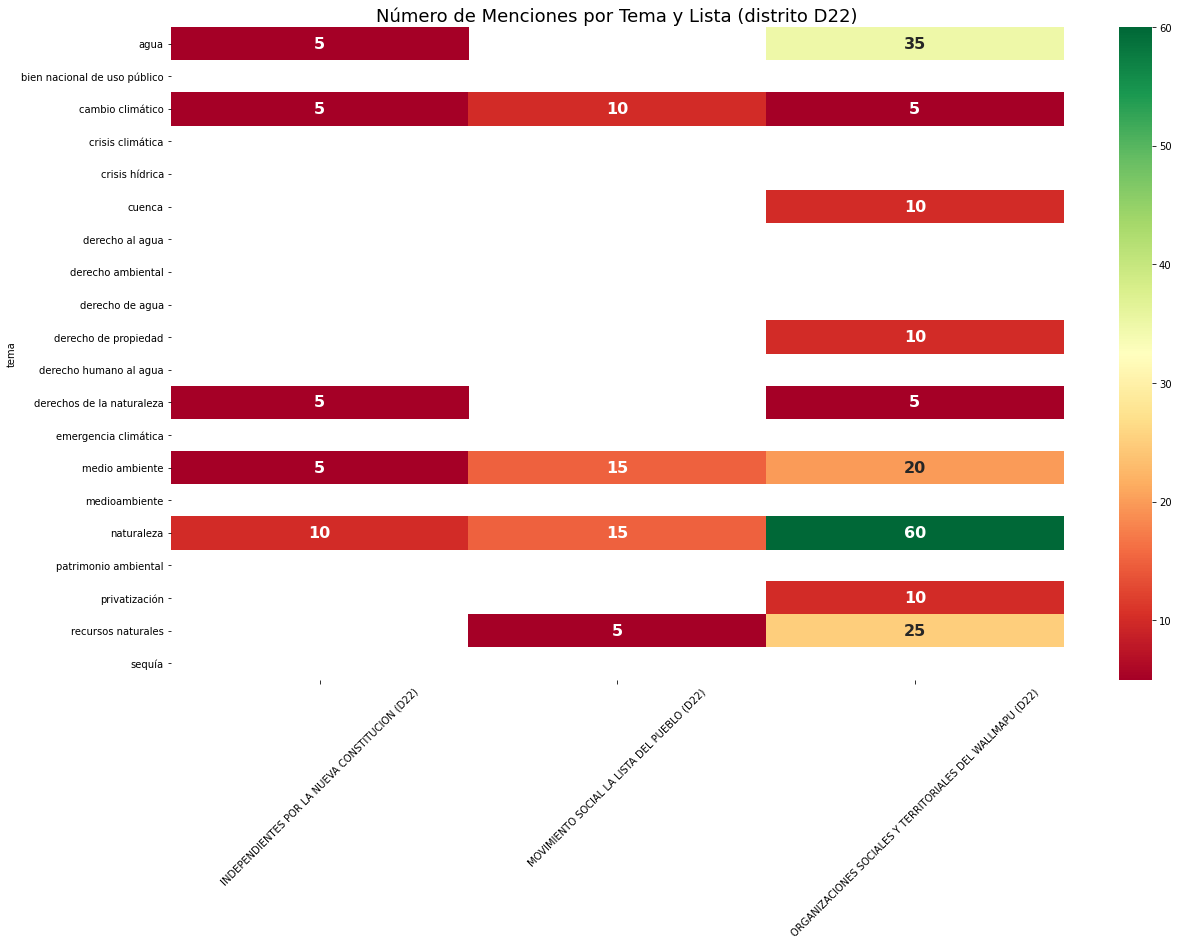

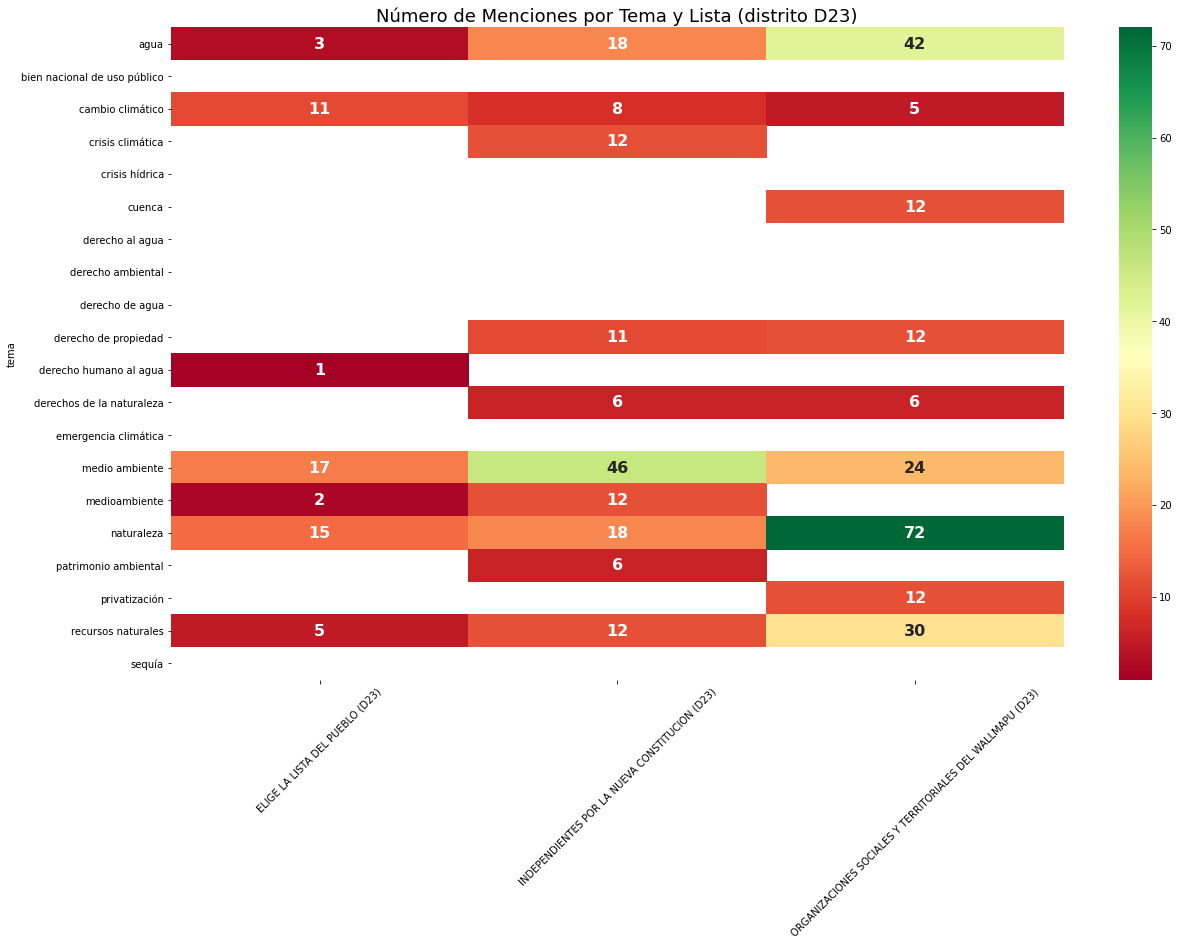

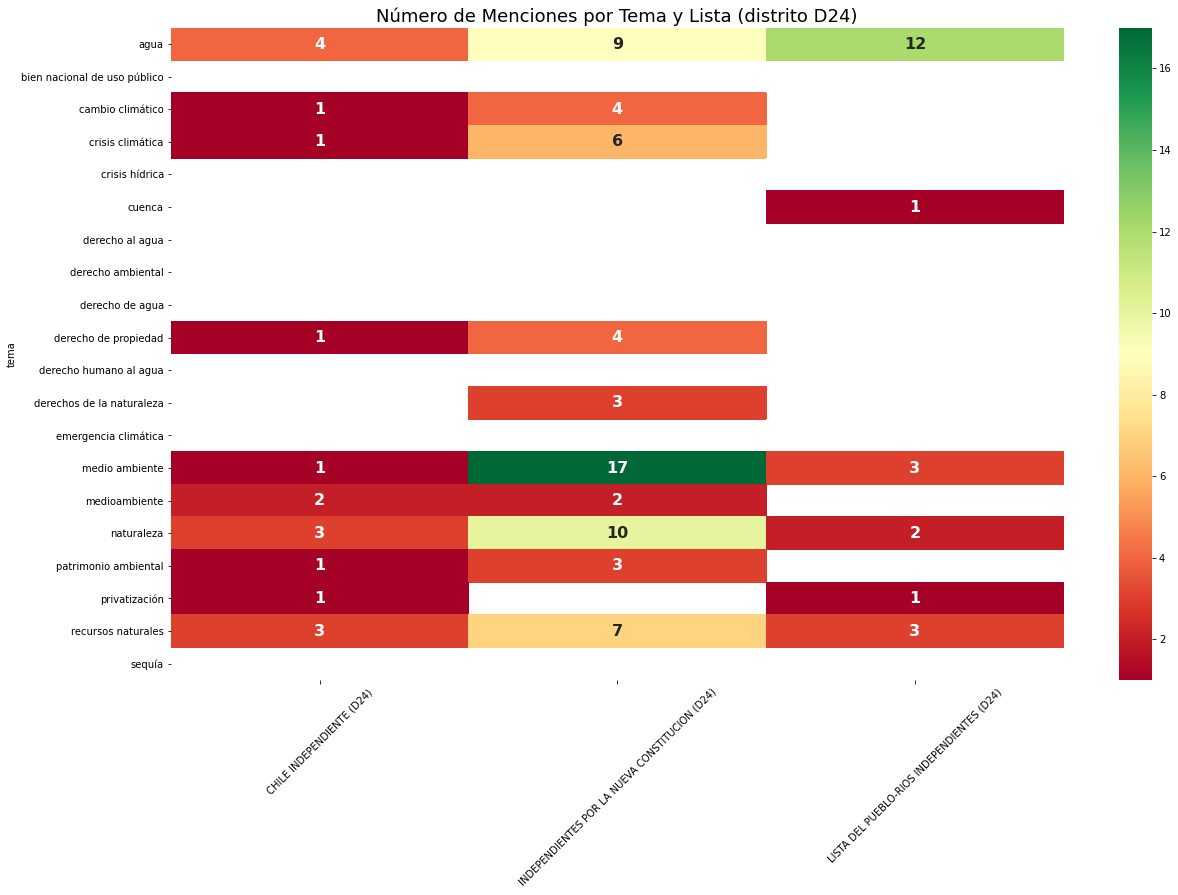

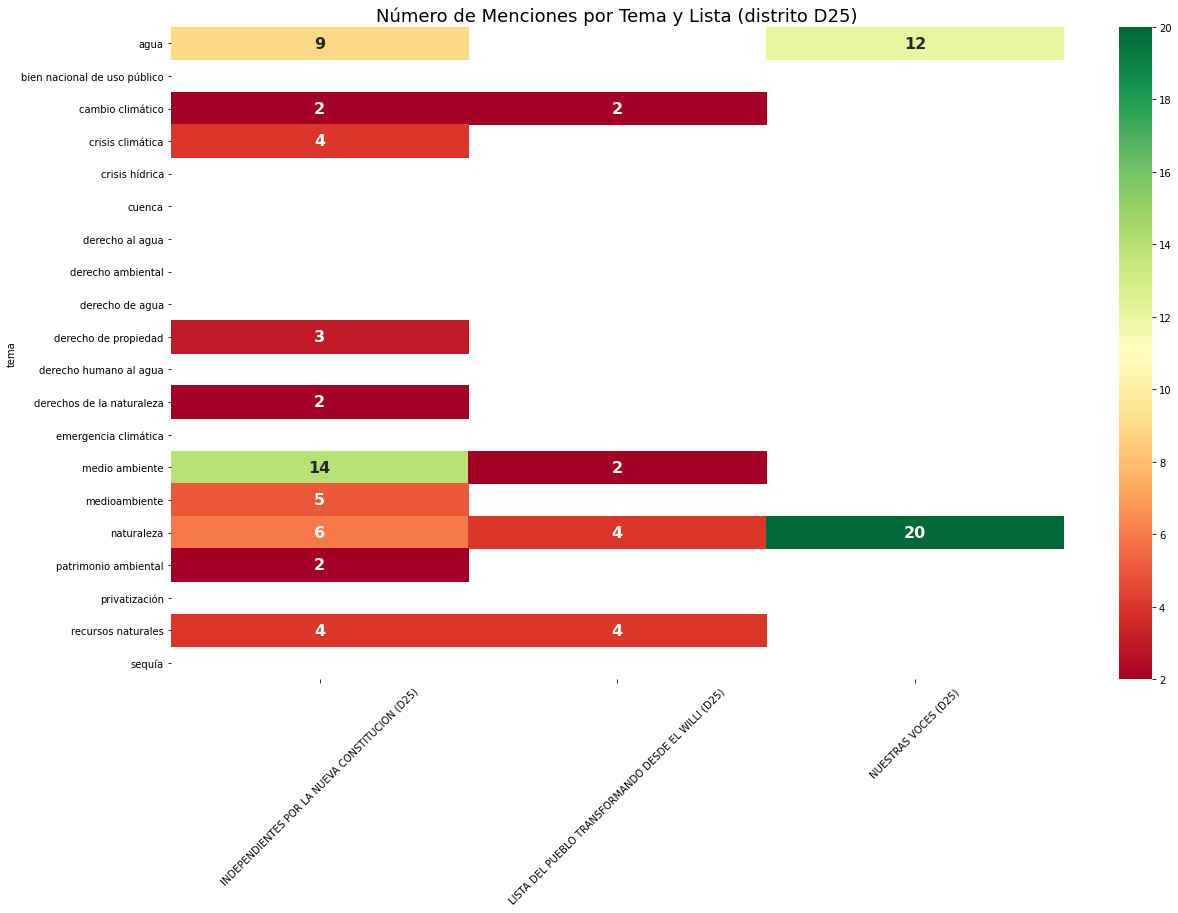

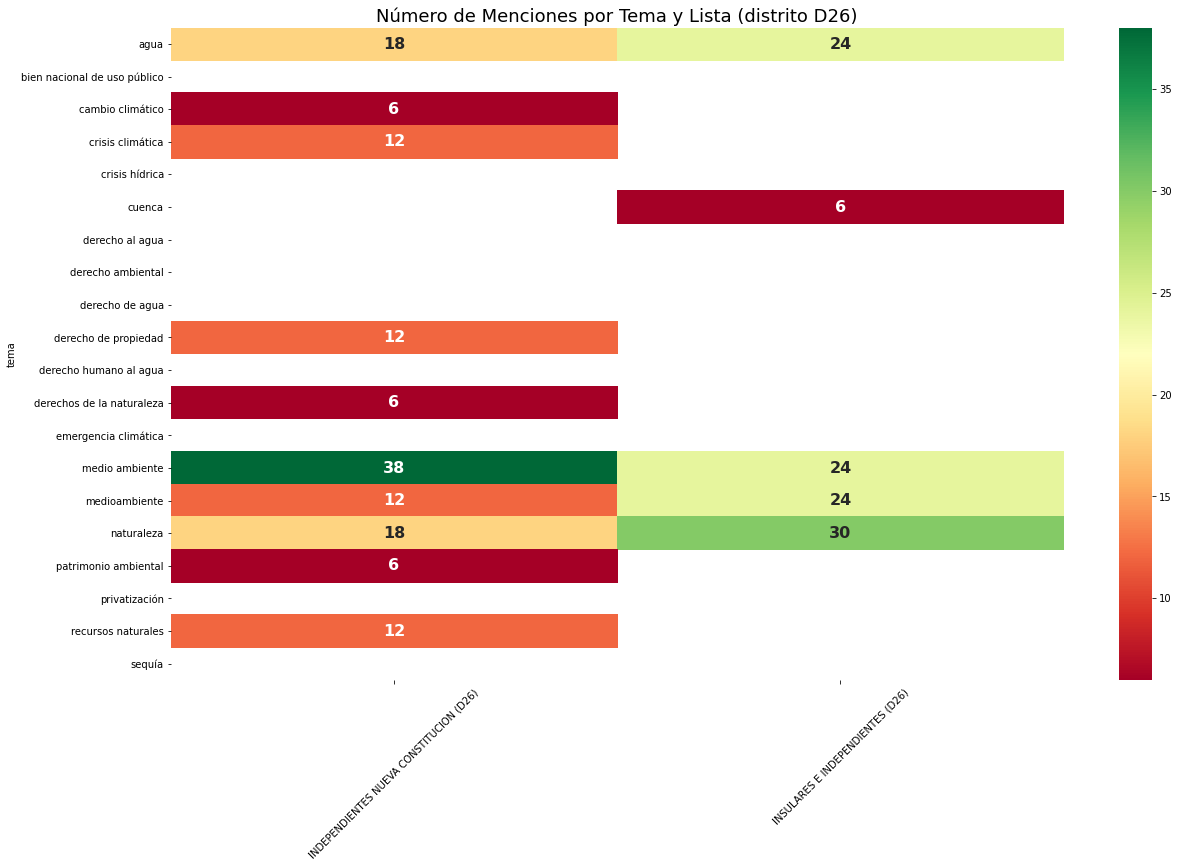

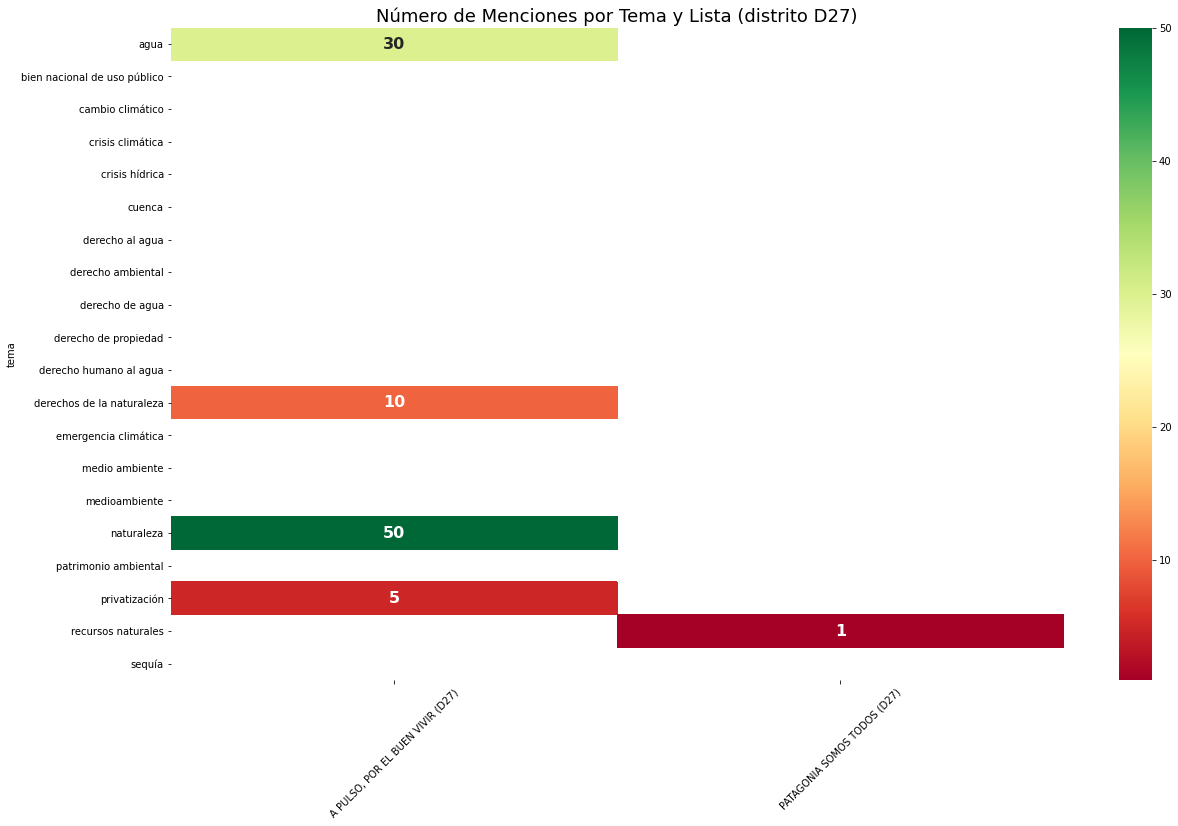

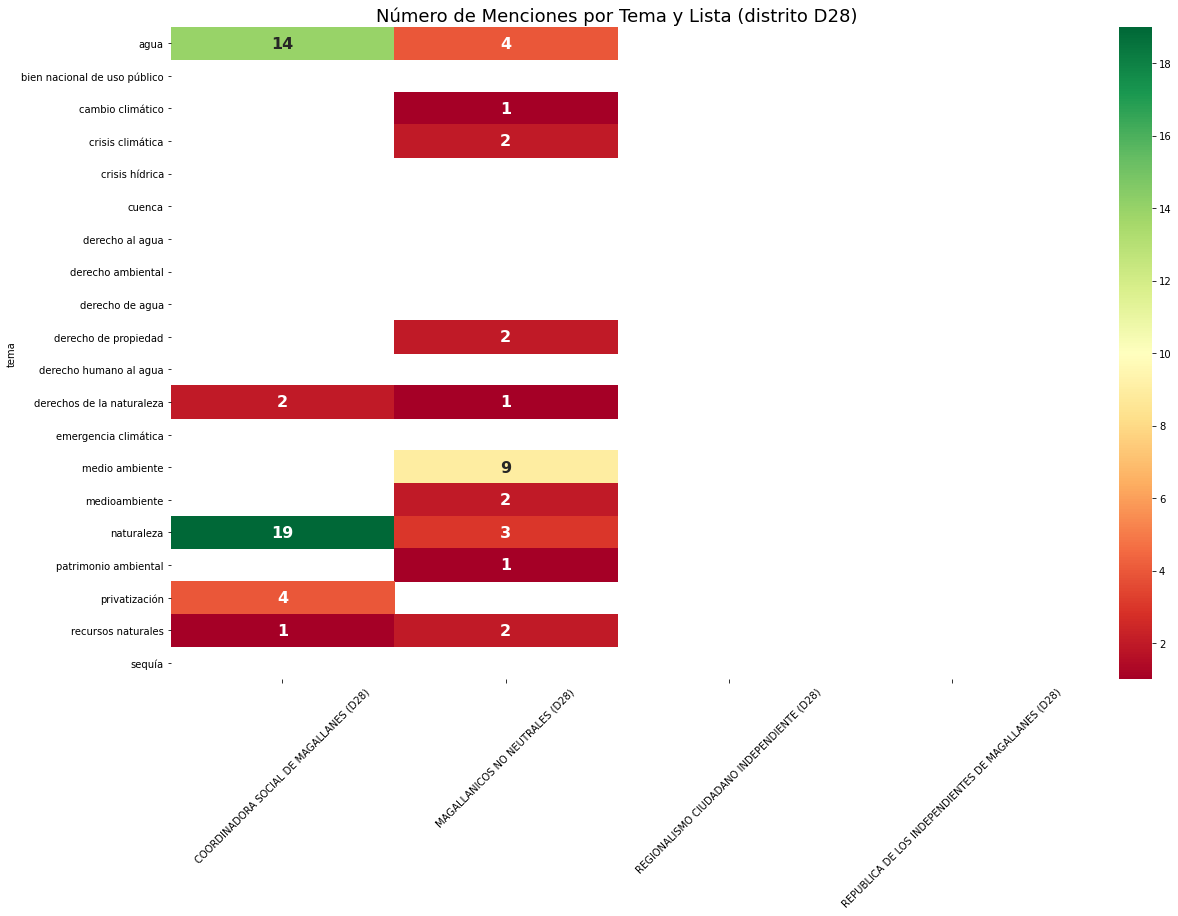

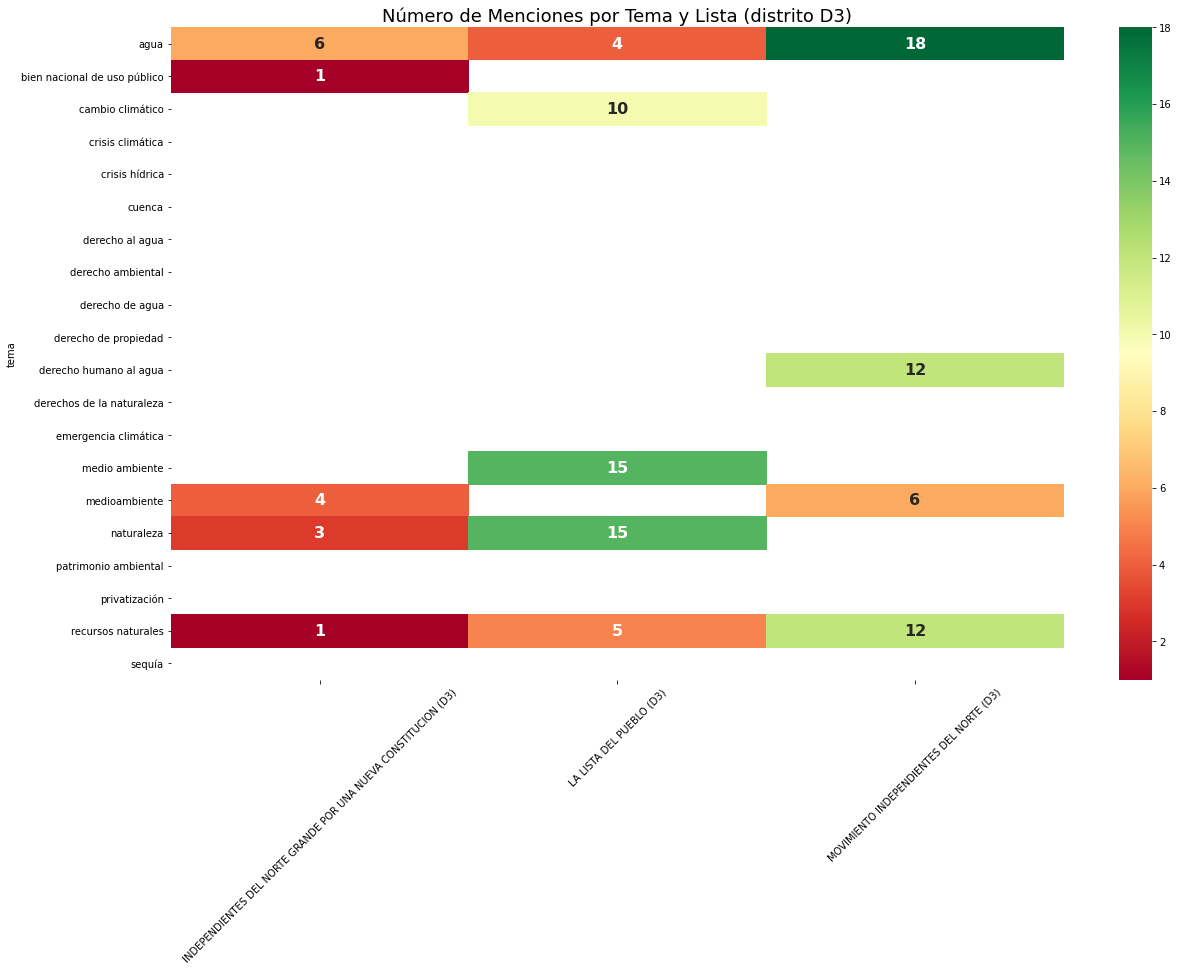

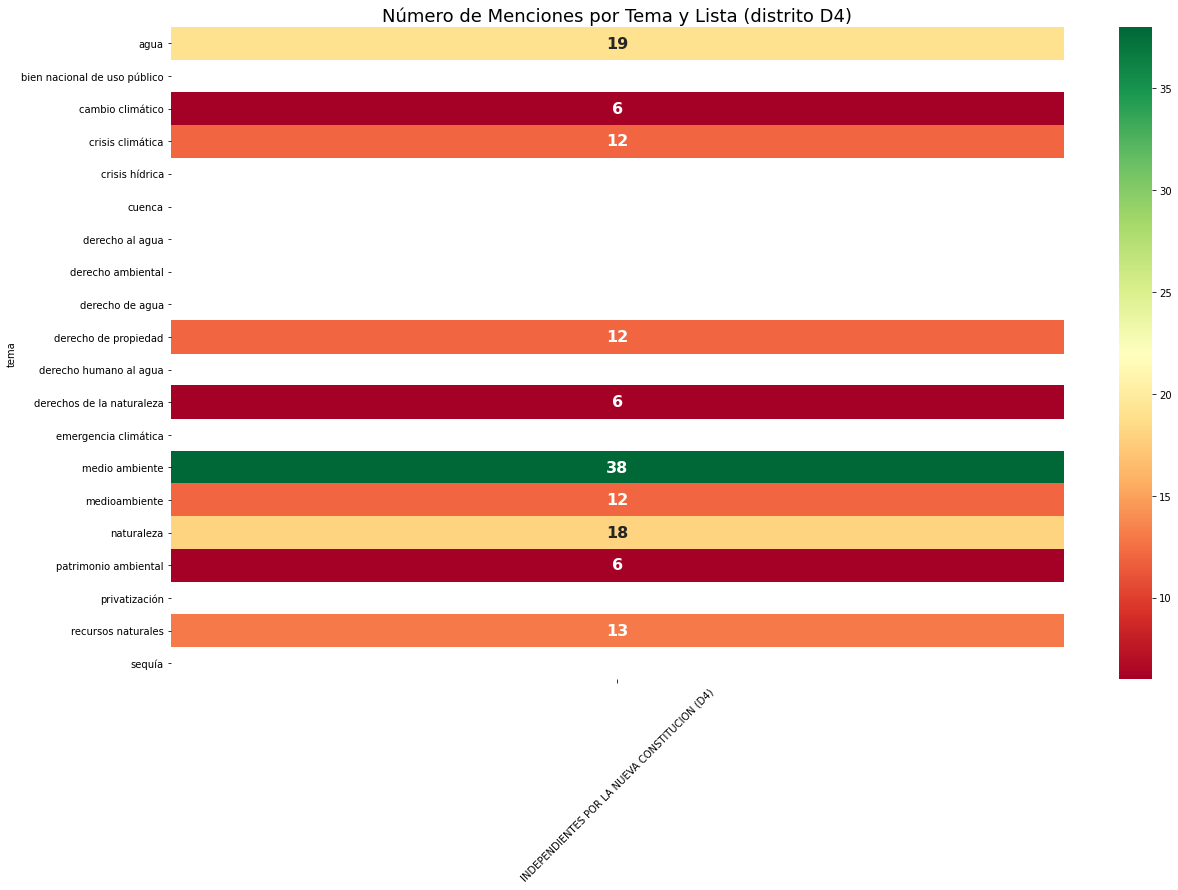

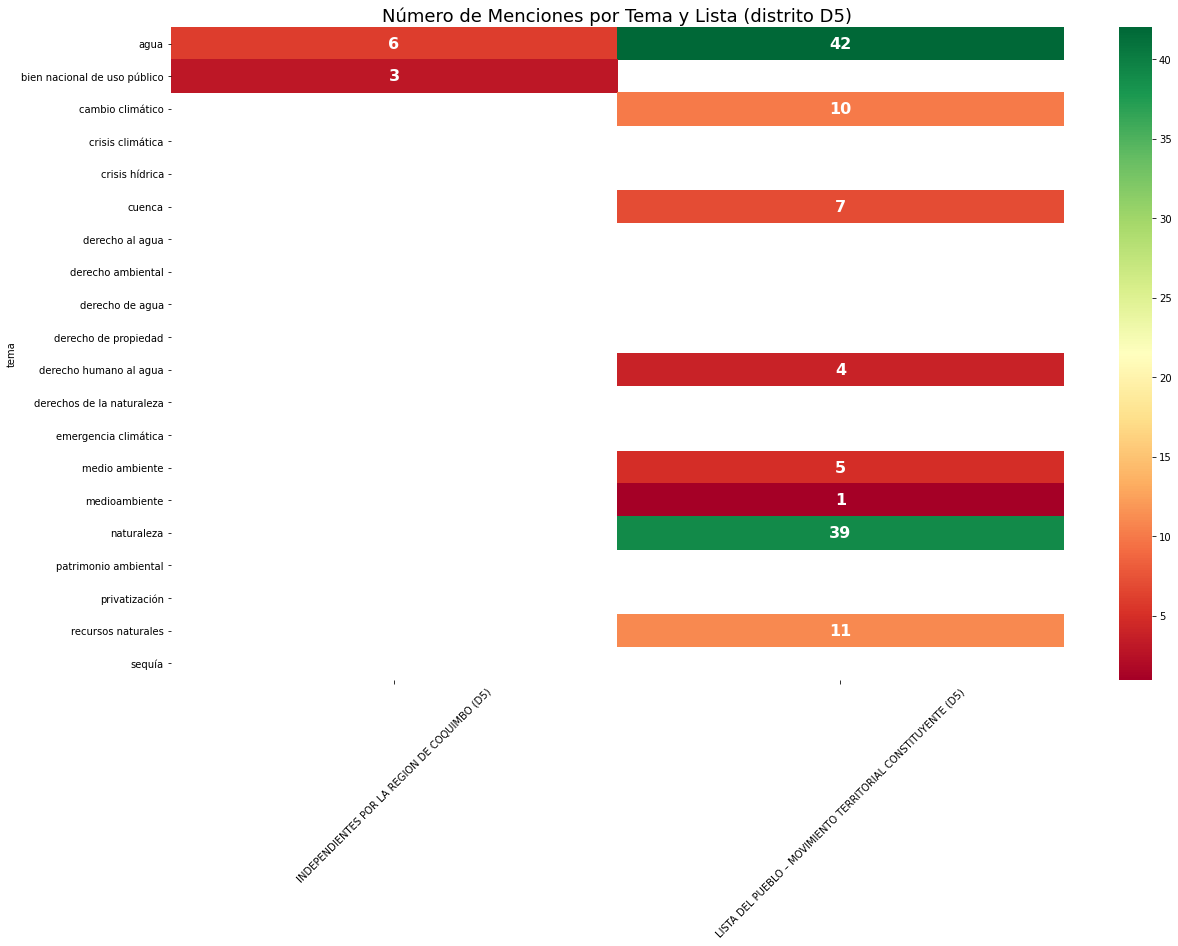

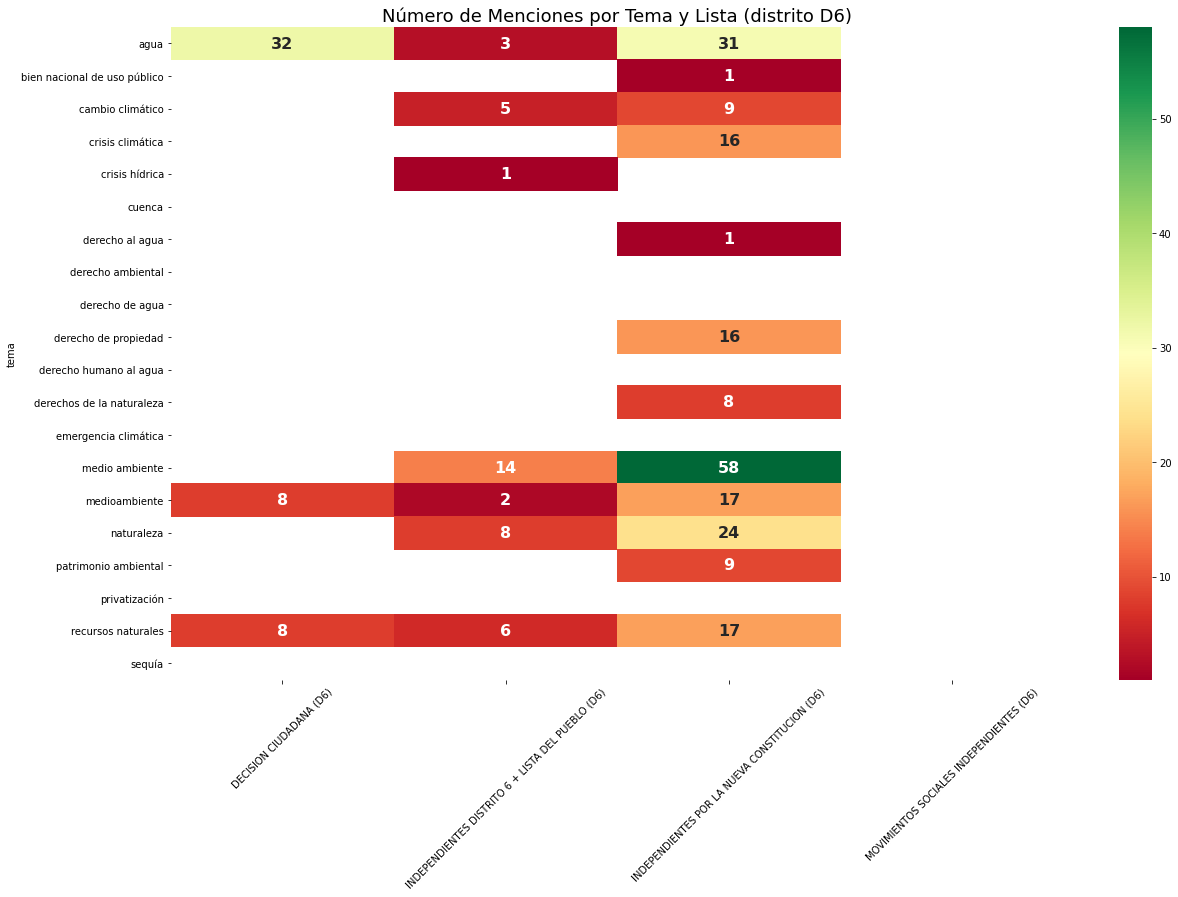

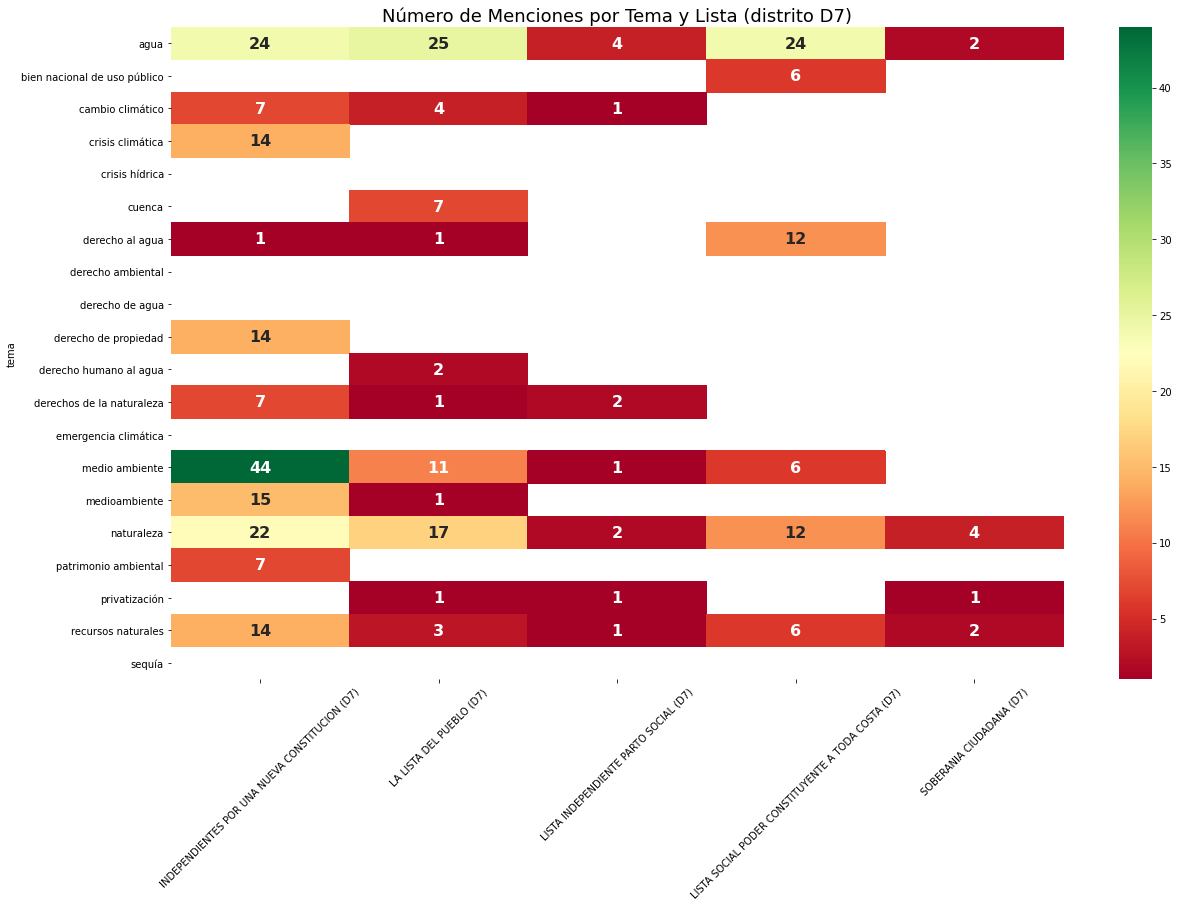

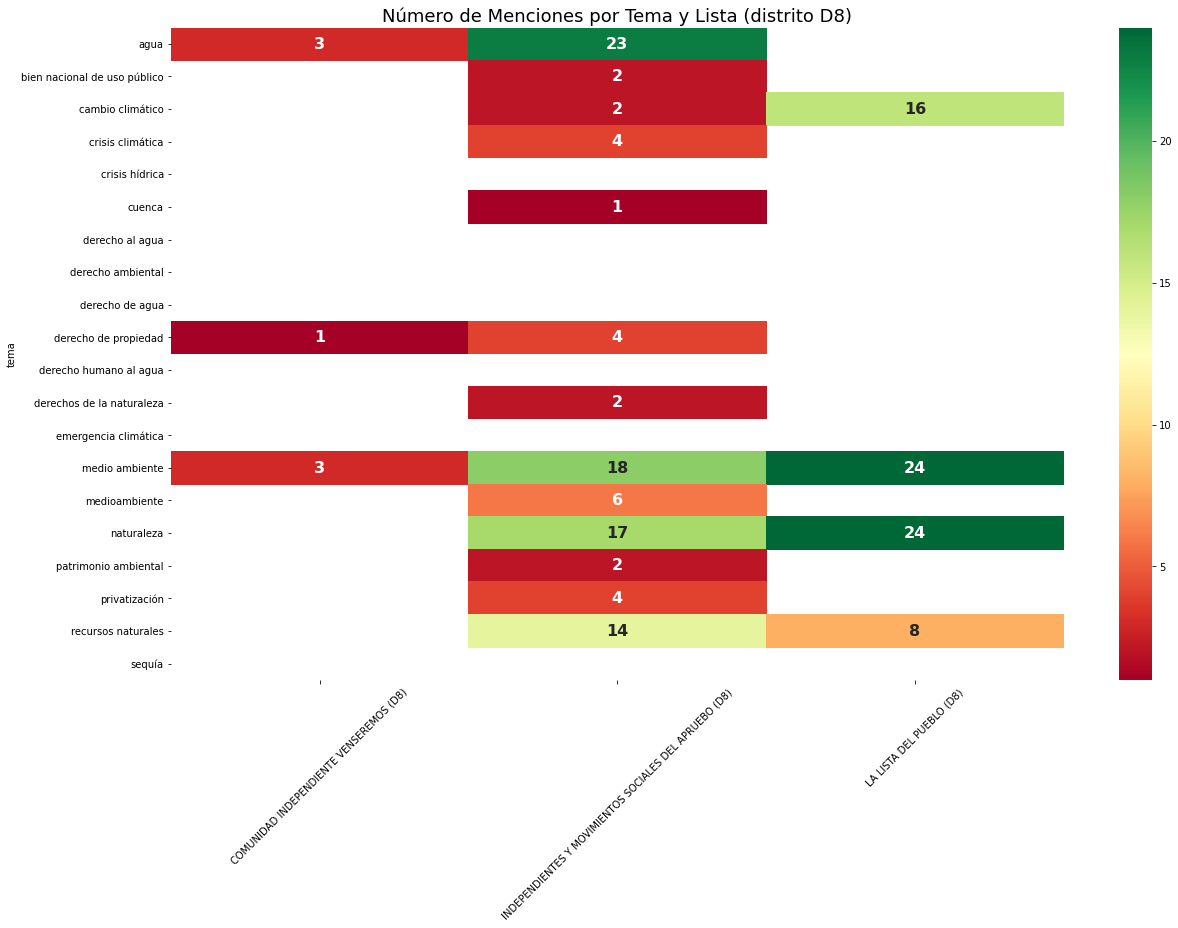

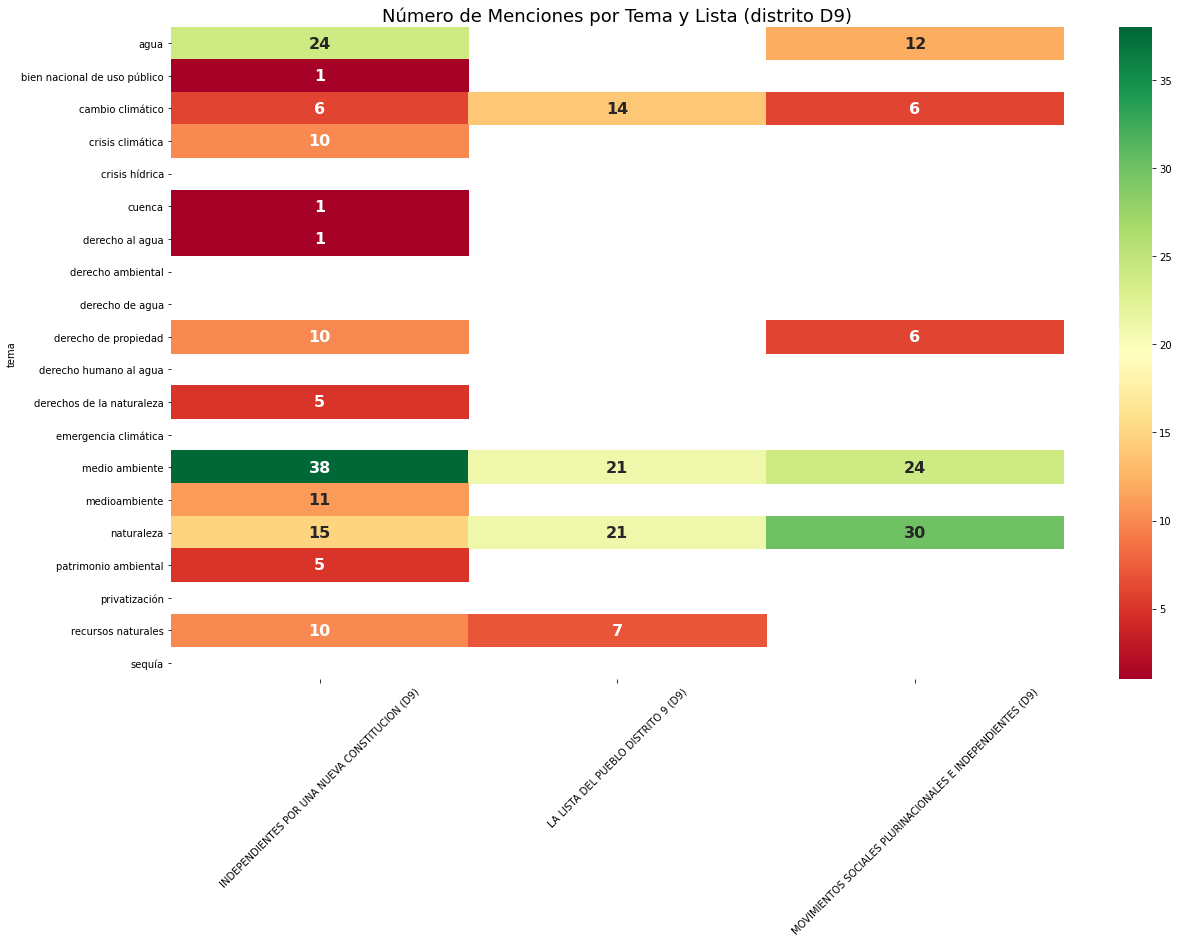

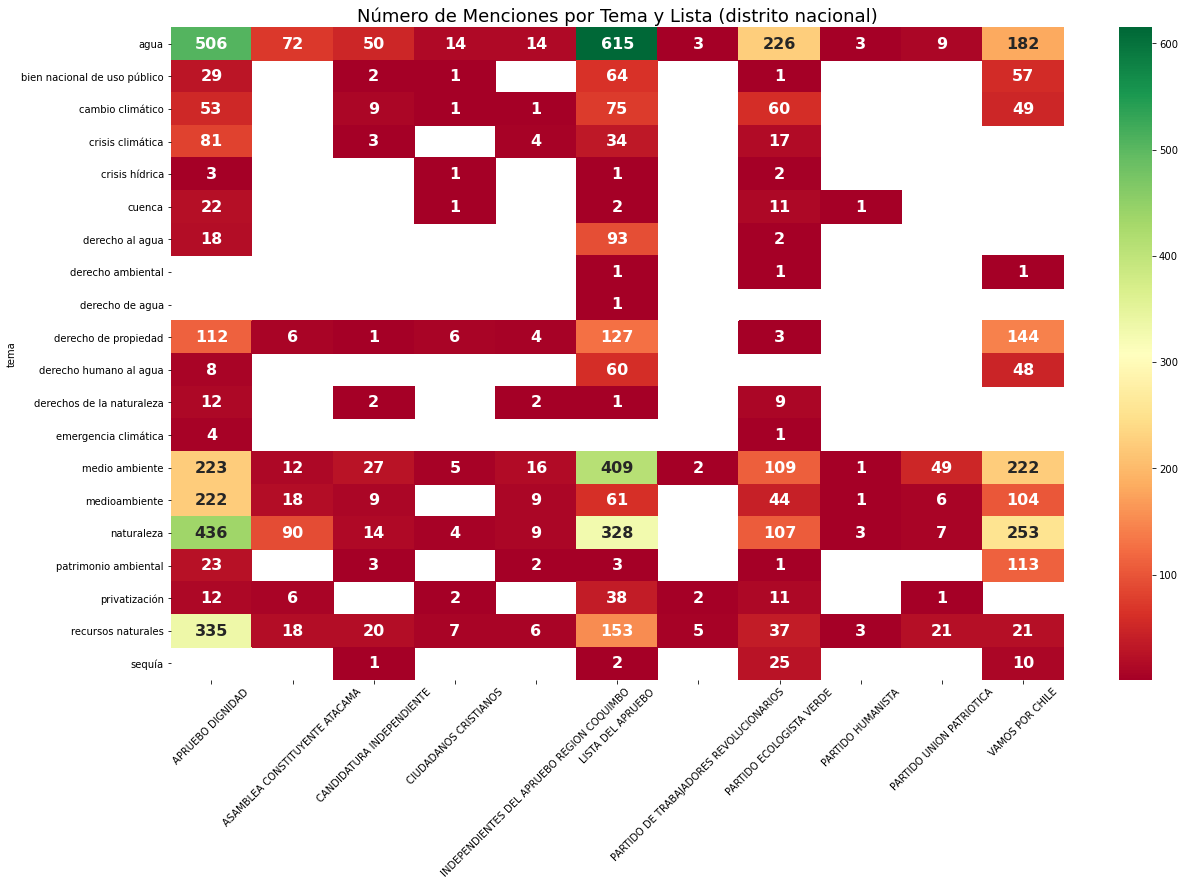

In [102]:
for dist, ldist in ldf.groupby('dist'):
    ldf1 = ldist.pivot_table(index='tema', columns='lista', aggfunc='sum'); ldf1[ldf1==0]=np.nan
    ldf1.columns = [c[1] for c in ldf1.columns]
    seaplot(ldf1, f'Número de Menciones por Tema y Lista (distrito {dist})', f'lista_{dist}.png', 45)